## Exploratory Data Analysis

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox 
from scipy.stats import yeojohnson
from scipy.stats import skew
%matplotlib inline

### Eksplorasi Awal Dataset

In [47]:
# Pilih Bank: BCA/BRI/MRI/BNI/BTN

bank = 'BNI'
bank_dataset = 'B' + bank + '.csv'
print(bank_dataset)

BBNI.csv


In [48]:
df = pd.read_csv(bank_dataset, usecols=['Date', 'Open', 'High', 'Low', 'Volume', 'Adj Close', 'Close'])
df

Date      Open      High       Low     Close Adj Close  Volume
0      1/4/2016  4,990.00  5,025.00  4,885.00  4,890.00  4,102.94   13.66
1      1/5/2016  4,890.00  4,975.00  4,890.00  4,950.00  4,153.28   26.46
2      1/6/2016  4,960.00  5,200.00  4,935.00  5,050.00  4,237.19   36.38
3      1/7/2016  5,000.00  5,075.00  4,985.00  4,985.00  4,182.65   18.65
4      1/8/2016  5,000.00  5,050.00  4,975.00  5,000.00  4,195.24   24.35
...         ...       ...       ...       ...       ...       ...     ...
1375  6/23/2021  4,970.00  4,970.00  4,850.00  4,850.00  4,850.00   39.58
1376  6/24/2021  4,850.00  4,890.00  4,790.00  4,820.00  4,820.00   29.24
1377  6/25/2021  4,820.00  4,880.00  4,760.00  4,760.00  4,760.00   27.94
1378  6/28/2021  4,750.00  4,750.00  4,580.00  4,580.00  4,580.00   53.98
1379  6/29/2021  4,580.00  4,660.00  4,560.00  4,580.00  4,580.00   25.53

[1380 rows x 7 columns]

### Memunculkan Missing Values pada Dataset

In [49]:
startdate = df['Date'].iloc[0]
enddate = df['Date'].iloc[-1]

start = datetime.datetime.strptime(startdate, "%m/%d/%Y")
end = datetime.datetime.strptime(enddate, "%m/%d/%Y")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days+1)]

dates = []
for date in date_generated:
    readable_date = date.strftime("%m/%d/%Y")
    dates.append(readable_date)
    
df_dates = pd.DataFrame(dates)
df_dates[0] = pd.to_datetime(df_dates[0])
df_dates.columns = ['Date']

In [50]:
df_copy = df.copy()
df_copy['Date'] = pd.to_datetime(df_copy['Date'])

In [51]:
df = pd.merge(df_dates, df_copy, how='left')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2004 entries, 0 to 2003
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2004 non-null   datetime64[ns]
 1   Open       1379 non-null   object        
 2   High       1379 non-null   object        
 3   Low        1379 non-null   object        
 4   Close      1379 non-null   object        
 5   Adj Close  1379 non-null   object        
 6   Volume     1379 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 125.2+ KB


#### Menyeragamkan Format Penulisan Data

In [53]:
df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 
                                                                  'Adj Close', 'Volume']].astype(str)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2004 entries, 0 to 2003
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2004 non-null   datetime64[ns]
 1   Open       2004 non-null   object        
 2   High       2004 non-null   object        
 3   Low        2004 non-null   object        
 4   Close      2004 non-null   object        
 5   Adj Close  2004 non-null   object        
 6   Volume     2004 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 125.2+ KB


In [55]:
df['Open'] = df['Open'].str.slice(0, -3, 1)
df['Open'] = df['Open'].str.replace(r',', '')
df['Open'] = pd.to_numeric(df['Open'])

df['High'] = df['High'].str.slice(0, -3, 1)
df['High'] = df['High'].str.replace(r',', '')
df['High'] = pd.to_numeric(df['High'])

df['Low'] = df['Low'].str.slice(0, -3, 1)
df['Low'] = df['Low'].str.replace(r',', '')
df['Low'] = pd.to_numeric(df['Low'])

df['Close'] = df['Close'].str.slice(0, -3, 1)
df['Close'] = df['Close'].str.replace(r',', '')
df['Close'] = pd.to_numeric(df['Close'])

df['Adj Close'] = df['Adj Close'].replace(r'nan', np.nan)
df['Adj Close'] = df['Adj Close'].str.replace(r',', '')
df['Adj Close'] = pd.to_numeric(df['Adj Close'])

df['Volume'] = df['Volume'].replace(r'nan', np.nan)
df['Volume'] = df['Volume'].str.replace(r'.', '')
df['Volume'] = df['Volume'].str.replace(r',', '')
df['Volume'] = pd.to_numeric(df['Volume'])

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2004 entries, 0 to 2003
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2004 non-null   datetime64[ns]
 1   Open       1379 non-null   float64       
 2   High       1379 non-null   float64       
 3   Low        1379 non-null   float64       
 4   Close      1379 non-null   float64       
 5   Adj Close  1379 non-null   float64       
 6   Volume     1379 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 125.2 KB


In [57]:
df.describe().T  # Statistik dasar

count         mean          std      min      25%      50%  \
Open       1379.0  6782.019579  1592.292143  3160.00  5425.00  6750.00   
High       1379.0  6863.386512  1600.862291  3410.00  5500.00  6825.00   
Low        1379.0  6694.815083  1587.855197  2970.00  5350.00  6650.00   
Close      1379.0  6778.404641  1598.452397  3160.00  5400.00  6750.00   
Adj Close  1379.0  6326.243343  1546.788997  3135.91  4786.81  6429.65   
Volume     1379.0  2602.860769  2504.523173     0.00  1231.50  2003.00   

               75%       max  
Open       7950.00  10175.00  
High       8025.00  10250.00  
Low        7850.00   9900.00  
Close      7925.00  10175.00  
Adj Close  7537.37   9305.72  
Volume     3225.50  22204.00

In [58]:
df

Date    Open    High     Low   Close  Adj Close  Volume
0    2016-01-04  4990.0  5025.0  4885.0  4890.0    4102.94  1366.0
1    2016-01-05  4890.0  4975.0  4890.0  4950.0    4153.28  2646.0
2    2016-01-06  4960.0  5200.0  4935.0  5050.0    4237.19  3638.0
3    2016-01-07  5000.0  5075.0  4985.0  4985.0    4182.65  1865.0
4    2016-01-08  5000.0  5050.0  4975.0  5000.0    4195.24  2435.0
...         ...     ...     ...     ...     ...        ...     ...
1999 2021-06-25  4820.0  4880.0  4760.0  4760.0    4760.00  2794.0
2000 2021-06-26     NaN     NaN     NaN     NaN        NaN     NaN
2001 2021-06-27     NaN     NaN     NaN     NaN        NaN     NaN
2002 2021-06-28  4750.0  4750.0  4580.0  4580.0    4580.00  5398.0
2003 2021-06-29  4580.0  4660.0  4560.0  4580.0    4580.00  2553.0

[2004 rows x 7 columns]

### Analisis Univariat Awal

Analisis berikut ini merupakan analisis univariat sederhana setiap variabel inti analisis. Perlu
diperhatikan bahwa seluruh analisis pada bagian ini belum mempertimbangkan karakteristik
sekuensial time series yang sebenarnya dimiliki oleh seluruh variabel yang dianalisis.

### 1) Open

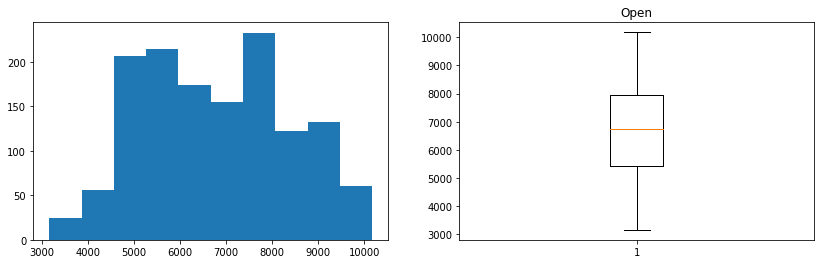

In [59]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Open')
ax1.hist(df['Open'][~np.isnan(df['Open'])], density=False)
ax2.boxplot(df['Open'][~np.isnan(df['Open'])])
plt.show()

In [60]:
df['Open'].skew()  # Semakin mendekati 0, maka akan semakin mendekati distribusi normal

0.08362853858281627

### 2) High

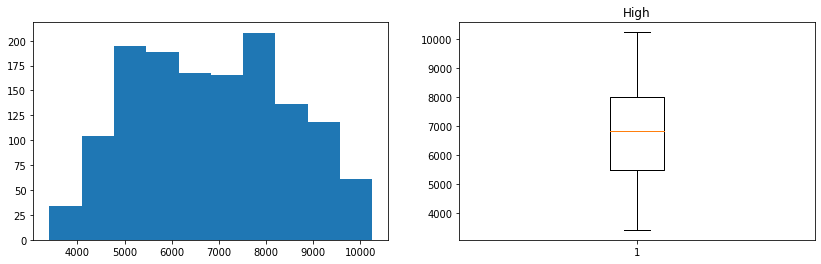

In [61]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('High')
ax1.hist(df['High'][~np.isnan(df['High'])], density=False)
ax2.boxplot(df['High'][~np.isnan(df['High'])])
plt.show()

In [62]:
df['High'].skew()

0.08465366659733457

### 3) Low

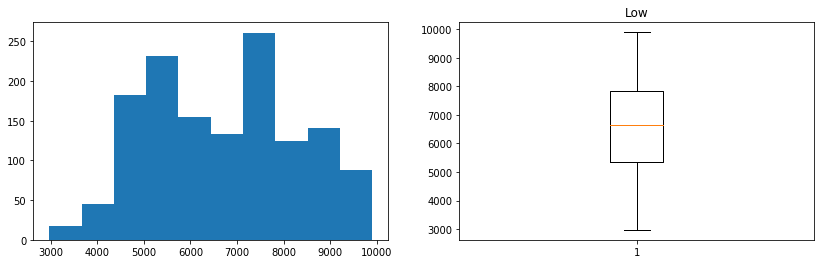

In [63]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Low')
ax1.hist(df['Low'][~np.isnan(df['Low'])], density=False)
ax2.boxplot(df['Low'][~np.isnan(df['Low'])])
plt.show()

In [64]:
df['Low'].skew()

0.07839205883293775

### 4) Volume

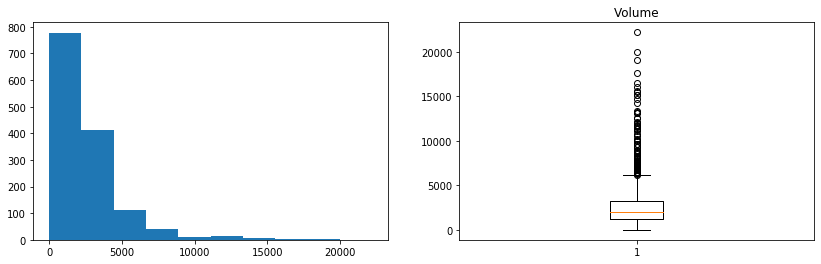

In [65]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Volume')
ax1.hist(df['Volume'][~np.isnan(df['Volume'])], density=False)
ax2.boxplot(df['Volume'][~np.isnan(df['Volume'])])
plt.show()

In [66]:
df['Volume'].skew()

2.8086897004837867

### 5) Adj Close

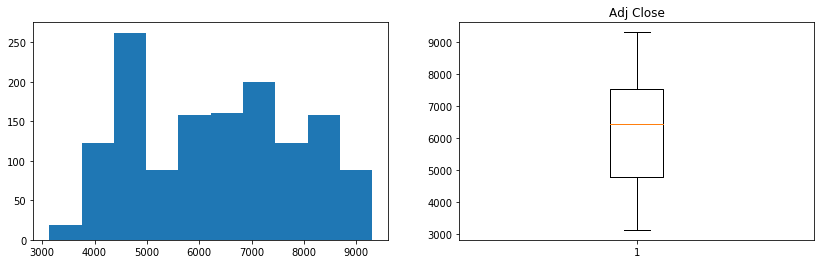

In [67]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Adj Close')
ax1.hist(df['Adj Close'][~np.isnan(df['Adj Close'])], density=False)
ax2.boxplot(df['Adj Close'][~np.isnan(df['Adj Close'])])
plt.show()

In [68]:
df['Adj Close'].skew()

0.03196568913197802

### 6) Close

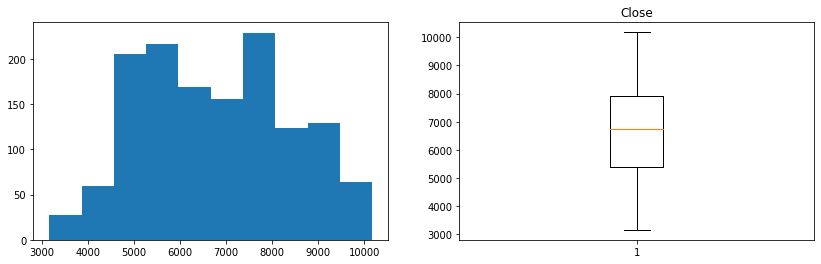

In [69]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Close')
ax1.hist(df['Close'][~np.isnan(df['Close'])], density=False)
ax2.boxplot(df['Close'][~np.isnan(df['Close'])])
plt.show()

In [70]:
df['Close'].skew()

0.08248353864678347

### Analisis Multivariat

Pada analisis multivariat, akan dilihat hubungan kovarians dan korelasi antar variabel. Kovarians yang bernilai positif antara variabel A dan B bermakna bahwa nilai A dan B berbanding lurus (Semakin besar nilai A, maka semakin besar pula nilai B). Sebaliknya, nilai kovarians yang negatif bermakna bahwa nilai A dan B berbanding terbalik. 

Sementara itu, nilai korelasi menunjukkan tingkat "kekuatan" hubungan yang diperoleh. Nilai korelasi yang mendekati 0 bermakna bahwa hubungan antara A dan B yang diperoleh (baik itu berbanding lurus ataupun terbalik) tidak signifikan/sangat lemah.

#### Kovarians

In [71]:
df.cov()

Open          High           Low         Close  \
Open       2.535394e+06  2.545017e+06  2.524661e+06  2.537837e+06   
High       2.545017e+06  2.562760e+06  2.536693e+06  2.555556e+06   
Low        2.524661e+06  2.536693e+06  2.521284e+06  2.534295e+06   
Close      2.537837e+06  2.555556e+06  2.534295e+06  2.555050e+06   
Adj Close  2.419363e+06  2.437982e+06  2.411955e+06  2.433471e+06   
Volume    -1.465893e+06 -1.403580e+06 -1.507092e+06 -1.452779e+06   

              Adj Close        Volume  
Open       2.419363e+06 -1.465893e+06  
High       2.437982e+06 -1.403580e+06  
Low        2.411955e+06 -1.507092e+06  
Close      2.433471e+06 -1.452779e+06  
Adj Close  2.392556e+06 -1.208244e+06  
Volume    -1.208244e+06  6.272636e+06

#### Korelasi

In [72]:
df.corr()

Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.998422  0.998549  0.997106   0.982307 -0.367582
High       0.998422  1.000000  0.997937  0.998692   0.984568 -0.350073
Low        0.998549  0.997937  1.000000  0.998497   0.982036 -0.378969
Close      0.997106  0.998692  0.998497  1.000000   0.984227 -0.362890
Adj Close  0.982307  0.984568  0.982036  0.984227   1.000000 -0.311888
Volume    -0.367582 -0.350073 -0.378969 -0.362890  -0.311888  1.000000

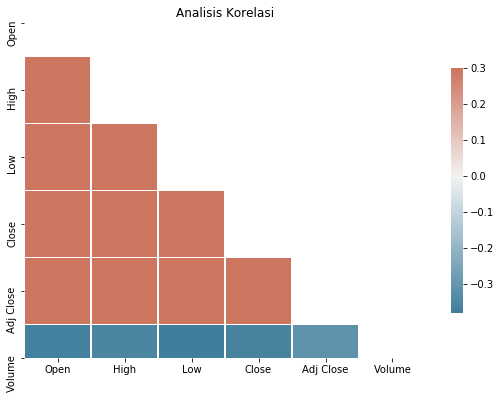

In [73]:
# Heatmap Visualization

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) # Generate a mask for the upper triangle

fig, ax = plt.subplots(figsize=(9, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.title('Analisis Korelasi')
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Hasil analisis multivariat menunjukkan bahwa variabel Volume tidak memiliki hubungan yang signifikan dengan variabel target (Close). Dengan kata lain, dapat disimpulkan bahwa nilai indeks saham tidak dipengaruhi secara signifikan oleh Volume.

Selain itu, diperoleh informasi bahwa terdapat hubungan yang kuat antara seluruh variabel independen selain Volume. Ini menunjukkan adanya multikolinearitas pada dataset yang digunakan, di mana terdapat korelasi antar variabel independen yang digunakan untuk memprediksi variabel target (Close). Dengan demikian, dapat dipertimbangkan untuk melakukan feature selection terlebih dahulu pada analisis lebih lanjut.

### Data Preprocessing

### Null Values Handling

In [74]:
df.isnull().sum()

Date           0
Open         625
High         625
Low          625
Close        625
Adj Close    625
Volume       625
dtype: int64

#### Mengisi null values

In [75]:
df = df.interpolate(method='linear')  # Melakukan interpolasi pada missing/null values
df

Date         Open         High     Low   Close  Adj Close  Volume
0    2016-01-04  4990.000000  5025.000000  4885.0  4890.0    4102.94  1366.0
1    2016-01-05  4890.000000  4975.000000  4890.0  4950.0    4153.28  2646.0
2    2016-01-06  4960.000000  5200.000000  4935.0  5050.0    4237.19  3638.0
3    2016-01-07  5000.000000  5075.000000  4985.0  4985.0    4182.65  1865.0
4    2016-01-08  5000.000000  5050.000000  4975.0  5000.0    4195.24  2435.0
...         ...          ...          ...     ...     ...        ...     ...
1999 2021-06-25  4820.000000  4880.000000  4760.0  4760.0    4760.00  2794.0
2000 2021-06-26  4796.666667  4836.666667  4700.0  4700.0    4700.00  3662.0
2001 2021-06-27  4773.333333  4793.333333  4640.0  4640.0    4640.00  4530.0
2002 2021-06-28  4750.000000  4750.000000  4580.0  4580.0    4580.00  5398.0
2003 2021-06-29  4580.000000  4660.000000  4560.0  4580.0    4580.00  2553.0

[2004 rows x 7 columns]

In [76]:
df.isnull().sum()  # Cek null values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Outliers Handling

### Data Transformation

Pada bagian ini, dilakukan transformasi setiap variabel agar menjadi lebih berdistribusi normal dan sesuai dengan kebutuhan mayoritas model, sekaligus untuk menangani outliers secara tidak langsung. Namun, perlu diperhatikan bahwa penanganan outliers dengan teknik ini masih belum mempertimbangkan karakteristik sekuensial time-series yang sebenarnya dimiliki oleh data.

### 1) Open

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


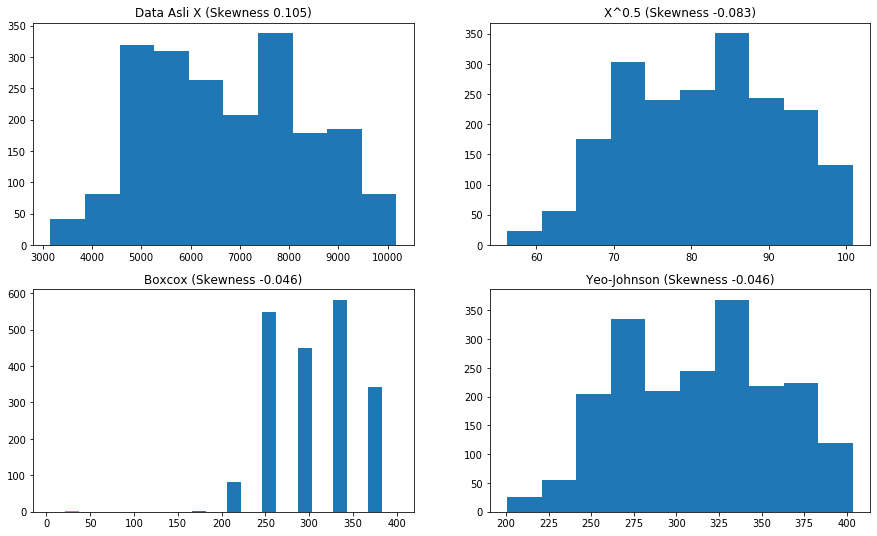

In [77]:
fig, ax = plt.subplots(2,2,figsize=(15,9))

skew_a = (df['Open']).skew()
ax[0,0].hist(df['Open'], density=False)
ax[0,0].set_title(f'Data Asli X (Skewness {skew_a:.3f})')

skew_b = (df['Open']**0.5).skew()
ax[0,1].hist(df['Open']**0.5, density=False)
ax[0,1].set_title(f'X^0.5 (Skewness {skew_b:.3f})')


skew_c = pd.DataFrame(boxcox(df['Open'])[0]).skew()[0]
ax[1,0].hist(boxcox(df['Open']), density=False)
ax[1,0].set_title(f'Boxcox (Skewness {skew_c:.3f})')

trans_data_open, lambda_data = yeojohnson(df['Open'])
skew_yeo = skew(trans_data_open)
ax[1,1].hist(trans_data_open, density=False)
ax[1,1].set_title(f'Yeo-Johnson (Skewness {skew_yeo:.3f})')

plt.show()

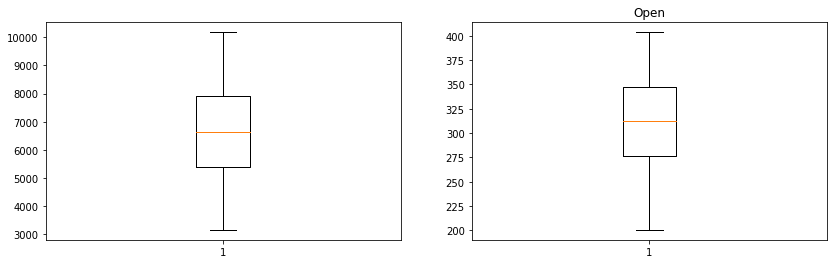

In [78]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Open')
ax1.boxplot(df['Open'])
ax2.boxplot(trans_data_open)
plt.show()

### 2) High

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


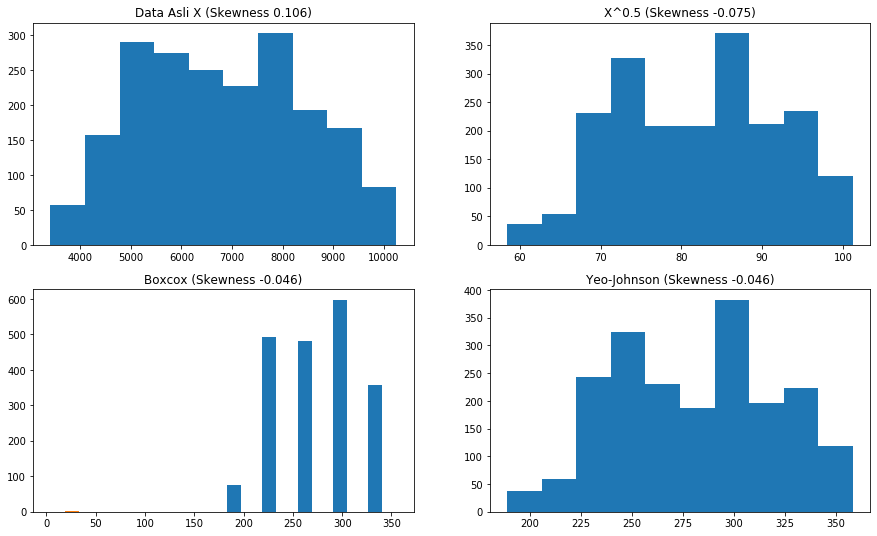

In [79]:
fig, ax = plt.subplots(2,2,figsize=(15,9))

skew_a = (df['High']).skew()
ax[0,0].hist(df['High'], density=False)
ax[0,0].set_title(f'Data Asli X (Skewness {skew_a:.3f})')

skew_b = (df['High']**0.5).skew()
ax[0,1].hist(df['High']**0.5, density=False)
ax[0,1].set_title(f'X^0.5 (Skewness {skew_b:.3f})')


skew_c = pd.DataFrame(boxcox(df['High'])[0]).skew()[0]
ax[1,0].hist(boxcox(df['High']), density=False)
ax[1,0].set_title(f'Boxcox (Skewness {skew_c:.3f})')

trans_data_high, lambda_data = yeojohnson(df['High'])
skew_yeo = skew(trans_data_high)
ax[1,1].hist(trans_data_high, density=False)
ax[1,1].set_title(f'Yeo-Johnson (Skewness {skew_yeo:.3f})')

plt.show()

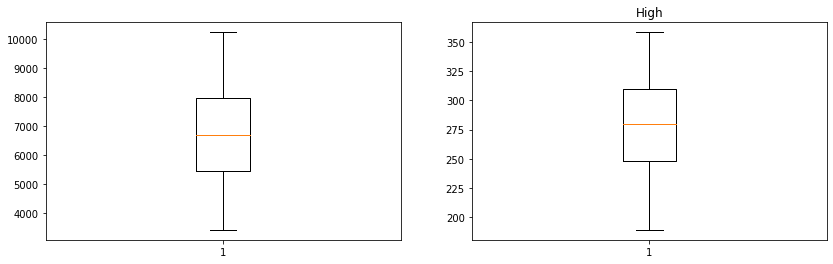

In [80]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('High')
ax1.boxplot(df['High'])
ax2.boxplot(trans_data_high)
plt.show()

### 3) Low

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


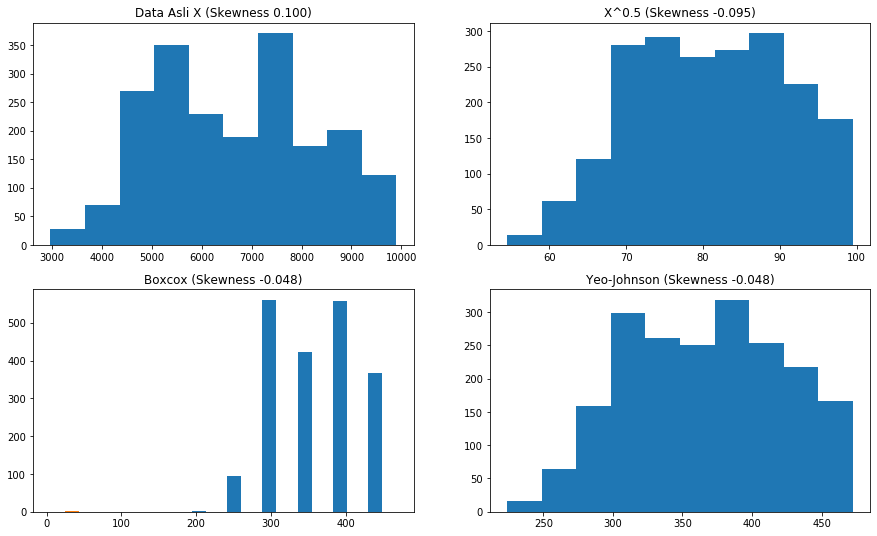

In [81]:
fig, ax = plt.subplots(2,2,figsize=(15,9))

skew_a = (df['Low']).skew()
ax[0,0].hist(df['Low'], density=False)
ax[0,0].set_title(f'Data Asli X (Skewness {skew_a:.3f})')

skew_b = (df['Low']**0.5).skew()
ax[0,1].hist(df['Low']**0.5, density=False)
ax[0,1].set_title(f'X^0.5 (Skewness {skew_b:.3f})')


skew_c = pd.DataFrame(boxcox(df['Low'])[0]).skew()[0]
ax[1,0].hist(boxcox(df['Low']), density=False)
ax[1,0].set_title(f'Boxcox (Skewness {skew_c:.3f})')

trans_data_low, lambda_data = yeojohnson(df['Low'])
skew_yeo = skew(trans_data_low)
ax[1,1].hist(trans_data_low, density=False)
ax[1,1].set_title(f'Yeo-Johnson (Skewness {skew_yeo:.3f})')

plt.show()

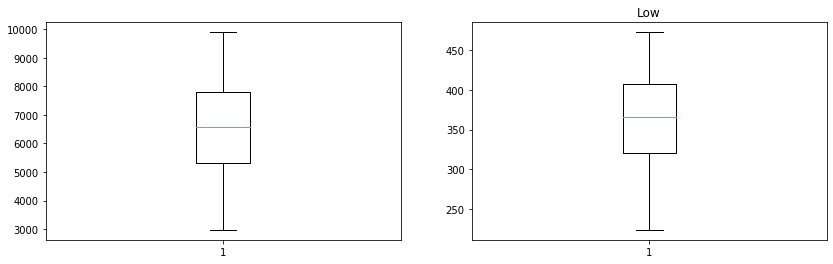

In [82]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Low')
ax1.boxplot(df['Low'])
ax2.boxplot(trans_data_low)
plt.show()

### 4) Volume

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


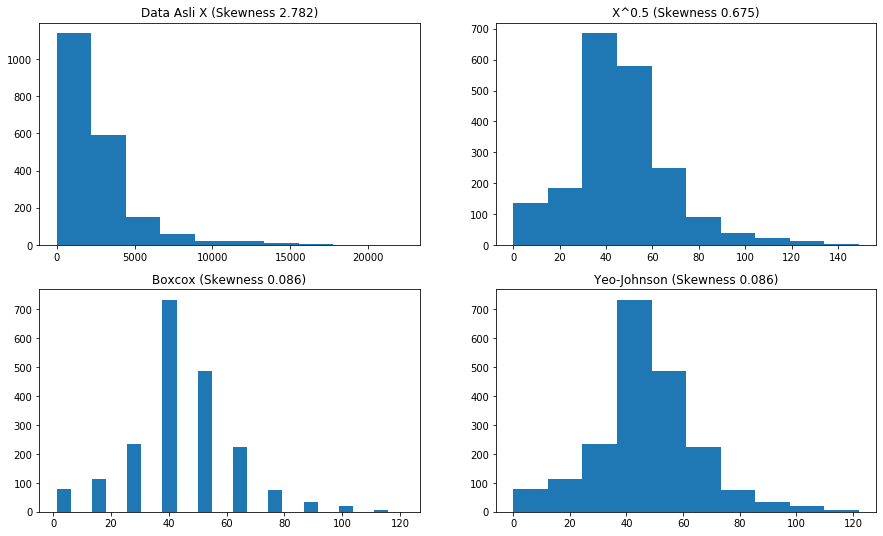

In [83]:
fig, ax = plt.subplots(2,2,figsize=(15,9))

skew_a = (df['Volume']).skew()
ax[0,0].hist(df['Volume'], density=False)
ax[0,0].set_title(f'Data Asli X (Skewness {skew_a:.3f})')

skew_b = (df['Volume']**0.5).skew()
ax[0,1].hist(df['Volume']**0.5, density=False)
ax[0,1].set_title(f'X^0.5 (Skewness {skew_b:.3f})')

skew_c = pd.DataFrame(boxcox(df['Volume']+1)[0]).skew()[0]
ax[1,0].hist(boxcox(df['Volume']+1), density=False)
ax[1,0].set_title(f'Boxcox (Skewness {skew_c:.3f})')

trans_data_volume, lambda_data = yeojohnson(df['Volume'])
skew_yeo = skew(trans_data_volume)
ax[1,1].hist(trans_data_volume, density=False)
ax[1,1].set_title(f'Yeo-Johnson (Skewness {skew_yeo:.3f})')

plt.show()

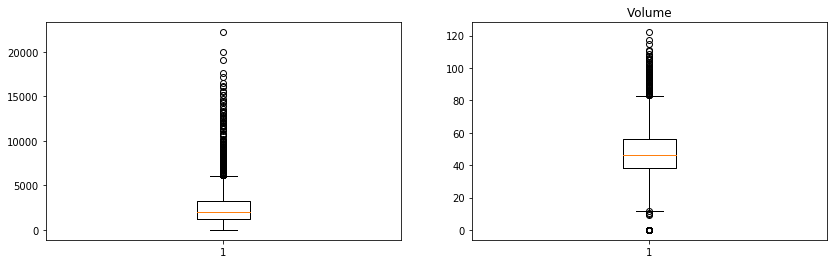

In [84]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Volume')
ax1.boxplot(df['Volume'])
ax2.boxplot(trans_data_volume)
plt.show()

### 5) Adj Close

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


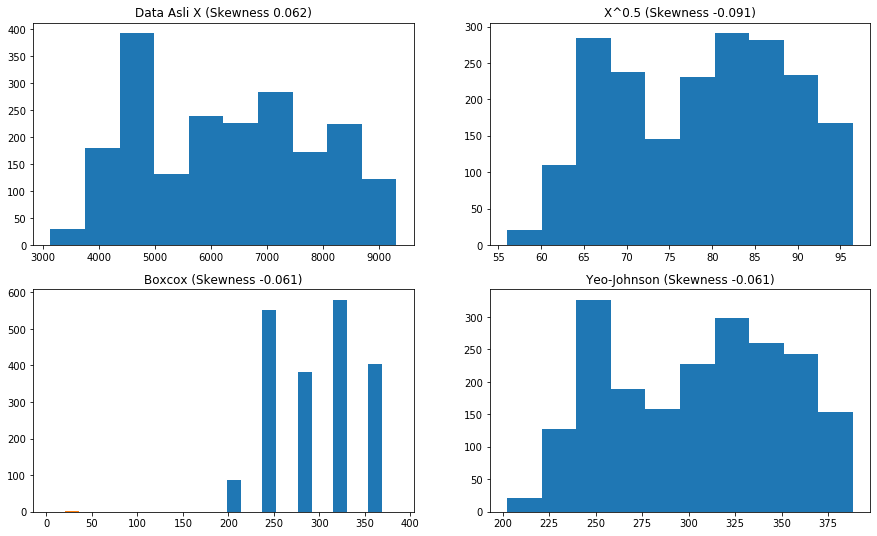

In [85]:
fig, ax = plt.subplots(2,2,figsize=(15,9))

skew_a = (df['Adj Close']).skew()
ax[0,0].hist(df['Adj Close'], density=False)
ax[0,0].set_title(f'Data Asli X (Skewness {skew_a:.3f})')

skew_b = (df['Adj Close']**0.5).skew()
ax[0,1].hist(df['Adj Close']**0.5, density=False)
ax[0,1].set_title(f'X^0.5 (Skewness {skew_b:.3f})')


skew_c = pd.DataFrame(boxcox(df['Adj Close'])[0]).skew()[0]
ax[1,0].hist(boxcox(df['Adj Close']), density=False)
ax[1,0].set_title(f'Boxcox (Skewness {skew_c:.3f})')

trans_data_adj, lambda_data = yeojohnson(df['Adj Close'])
skew_yeo = skew(trans_data_adj)
ax[1,1].hist(trans_data_adj, density=False)
ax[1,1].set_title(f'Yeo-Johnson (Skewness {skew_yeo:.3f})')

plt.show()

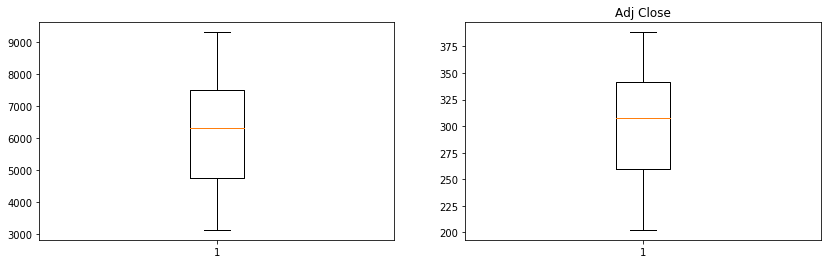

In [86]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Adj Close')
ax1.boxplot(df['Adj Close'])
ax2.boxplot(trans_data_adj)
plt.show()

### 6) Close

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


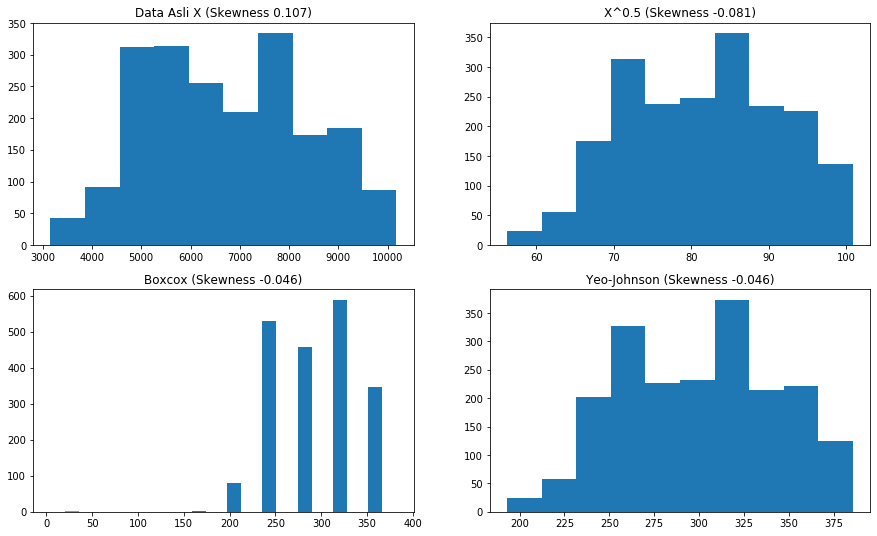

In [87]:
fig, ax = plt.subplots(2,2,figsize=(15,9))

skew_a = (df['Close']).skew()
ax[0,0].hist(df['Close'], density=False)
ax[0,0].set_title(f'Data Asli X (Skewness {skew_a:.3f})')

skew_b = (df['Close']**0.5).skew()
ax[0,1].hist(df['Close']**0.5, density=False)
ax[0,1].set_title(f'X^0.5 (Skewness {skew_b:.3f})')


skew_c = pd.DataFrame(boxcox(df['Close'])[0]).skew()[0]
ax[1,0].hist(boxcox(df['Close']), density=False)
ax[1,0].set_title(f'Boxcox (Skewness {skew_c:.3f})')

trans_data_close, lambda_data = yeojohnson(df['Close'])
skew_yeo = skew(trans_data_close)
ax[1,1].hist(trans_data_close, density=False)
ax[1,1].set_title(f'Yeo-Johnson (Skewness {skew_yeo:.3f})')

plt.show()

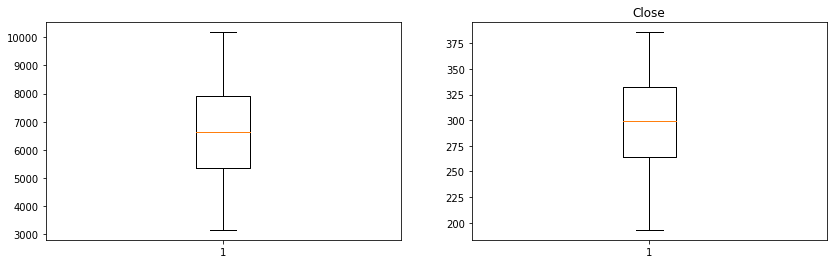

In [88]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
plt.title('Close')
ax1.boxplot(df['Close'])
ax2.boxplot(trans_data_close)
plt.show()

In [89]:
df_transformed = df.copy()

df_transformed['Open'] = trans_data_open
df_transformed['High'] = trans_data_high
df_transformed['Low'] = trans_data_low
df_transformed['Volume'] = trans_data_volume
df_transformed['Adj Close'] = trans_data_adj
df_transformed['Close'] = trans_data_close

df_transformed = df_transformed.reset_index(drop=True)
df_transformed

Date        Open        High         Low       Close   Adj Close  \
0    2016-01-04  263.680365  236.845437  304.956356  250.045094  237.712467   
1    2016-01-05  260.507585  235.470514  305.149967  251.857448  239.459158   
2    2016-01-06  262.731261  241.612840  306.889069  254.858070  242.351782   
3    2016-01-07  263.996219  238.214602  308.814304  252.910479  240.474288   
4    2016-01-08  263.996219  237.530734  308.429850  253.360846  240.908562   
...         ...         ...         ...         ...         ...         ...   
1999 2021-06-25  258.270959  232.841997  300.091148  246.086633  259.879254   
2000 2021-06-26  257.522494  231.635862  297.738503  244.244662  257.908658   
2001 2021-06-27  256.772550  230.425160  295.374337  242.392987  255.927883   
2002 2021-06-28  256.021118  229.209832  292.998443  240.531430  253.936743   
2003 2021-06-29  250.500495  226.670646  292.203835  240.531430  253.936743   

         Volume  
0     39.756231  
1     52.109623  
2     59.287322  
3     45.181019  
4     50.377446  
...         ...  
1999  53.274676  
2000  59.445094  
2001  64.772092  
2002  69.504744  
2003  51.356983  

[2004 rows x 7 columns]

### Analisis Univariat Lanjutan & Pendeteksian Anomali

Pada bagian ini, akan dilakukan analisis tren setiap variabel terhadap variabel ‘Date’ sekaligus melakukan penanganan outliers (anomali) lanjutan, yaitu dengan mempertimbangkan karakteristik sekuensial time-series yang dimiliki oleh setiap variabel pada data.

### 1) Open

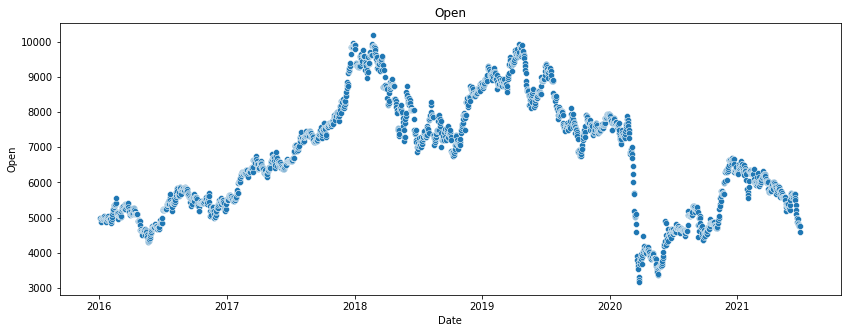

In [90]:
fig, (ax1) = plt.subplots(1,figsize=(14,5))
plt.title('Open')
sns.scatterplot(x=df['Date'], y=df['Open'])

#### Anomaly Detection - ARIMA

ARIMA mensyaratkan data time series untuk memiliki sifat stasioner, yaitu karakteristik data hanya bergantung pada selisih (difference) dari suatu selang waktu, bukan tergantung pada kapan selang waktu tersebut terjadi. Untuk itu, data dapat dikatakan stasioner jika memiliki karakteristik:
1. Mean dan varians yang stabil 
2. Tidak memiliki trend
3. Tidak memiliki seasonality

In [91]:
from statsmodels.tsa.stattools import adfuller

def adfullertest(data):
    result = adfuller(data)
    print(f'ADF Statistics: {result[0]}')
    print(f'p-Value: {result[1]}')
    if result[1] < 0.05:
        print('Stationary')
    else:
        print('Non-Stationary')

Augmented Dickey-Fuller (ADF test) merupakan pengujian statistik untuk mengukur stationarity data. Pengujian ini memiliki hipotesis nol (H0) bahwa data tidak stasioner. Umumnya jika p-value < 0.05, maka dianggap telah cukup bukti untuk menolak H0 dan menerima H1 bahwa data telah memiliki sifat stasioner.

In [92]:
adfullertest(df['Open'])

ADF Statistics: -1.5011512293903688
p-Value: 0.5329417655105644
Non-Stationary


Hasil ADF Test menunjukkan p-value > 0.05. Dari nilai ini dapat ditarik kesimpulan bahwa data masih sangat jauh dari sifat stasioner untuk dapat dijadikan sebagai input ARIMA. Untuk itu, akan digunakan teknik differencing untuk menghilangkan trend dari data dan sekaligus membuat data menjadi lebih stasioner.

#### Differencing Technique

In [93]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

#### Data Asli

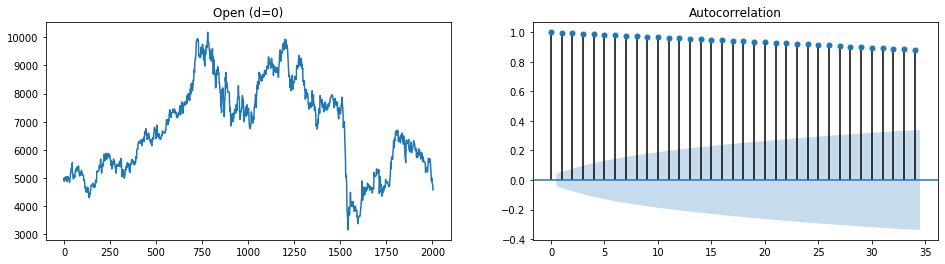

In [94]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Open'])
ax1.set_title('Open (d=0)')
plot_acf(df['Open'], ax=ax2);

Dari visualisasi, mudah terlihat bahwa data asli masih jauh dari sifat stasioner.

#### First Order Differencing (d=1)

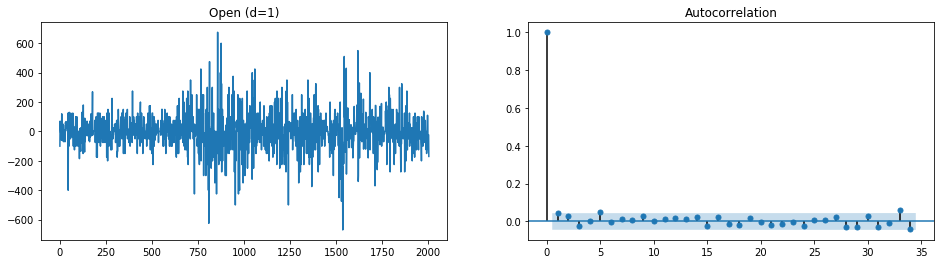

In [95]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Open'].diff().dropna())
ax1.set_title('Open (d=1)')
plot_acf(df['Open'].diff().dropna(), ax=ax2);

Penggunaan teknik differencing sebanyak satu kali terlihat telah berhasil menekan trend dari data dan membuat data menjadi lebih stabil. Selanjutnya dapat diperiksa penggunaan differencing sebanyak dua kali untuk melihat apakah ada perbaikan lebih lanjut yang signifikan.

#### Second Order Differencing (d=2)

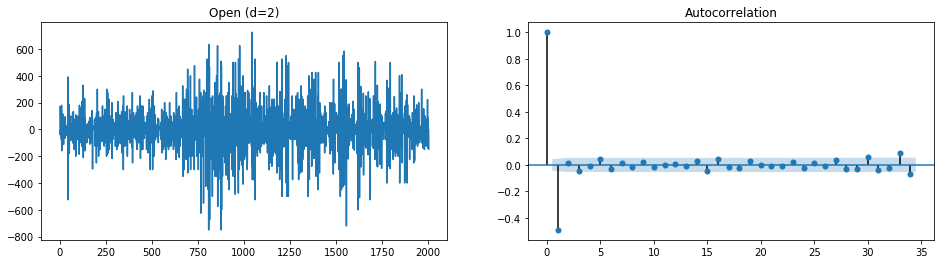

In [96]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Open'].diff().diff().dropna())
ax1.set_title('Open (d=2)')
plot_acf(df['Open'].diff().diff().dropna(), ax=ax2);

Terlihat bahwa differencing sebanyak dua kali tidak terlalu membawa perubahan berarti pada data yang dilakukan differencing sebanyak satu kali. Dari informasi ini, akan digunakan parameter differencing ARIMA d=1. Hasil tersebut juga didukung oleh hasil pencarian otomatis jumlah diferensiasi (ndiffs) menggunakan library pmdarima berikut:

In [97]:
from pmdarima.arima.utils import ndiffs

ndiff = ndiffs(df['Open'], test='adf')
print(f'Differencing coefficient d = {ndiff}')

Differencing coefficient d = 1


#### Autoregression (AR) Parameter

Parameter Autoregression (p) pada ARIMA merupakan jumlah lags yang digunakan ARIMA untuk melakukan prediksi. Dengan kata lain, parameter ini menunjukkan seberapa jauh ARIMA akan meihat past values untuk melakukan prediksi terhadap data baru. Untuk menentukannya dapat digunakan analisis Partial Autocorrelation Function (PACF).

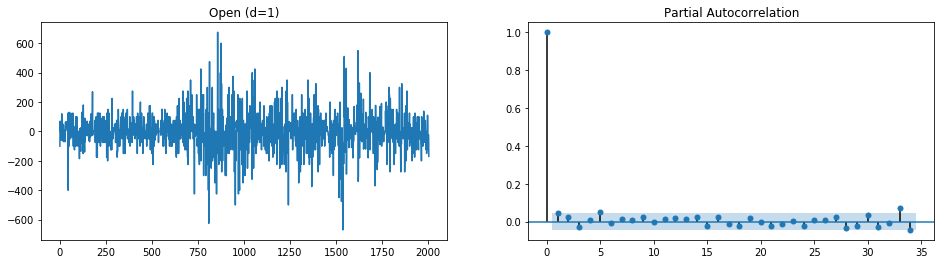

In [98]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Open'].diff().dropna())
ax1.set_title('Open (d=1)')
plot_pacf(df['Open'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai p term pada ARIMA. Pada model ini, akan digunakan p = 3.

#### Moving Average (MA) Parameter

Parameter Moving Average (q) pada ARIMA menunjukkan seberapa jauh error lags yang dipertimbangkan untuk melakukan prediksi. Parameter ini dapat ditentukan dengan menggunakan analisis Autocorrelation Function (ACF).

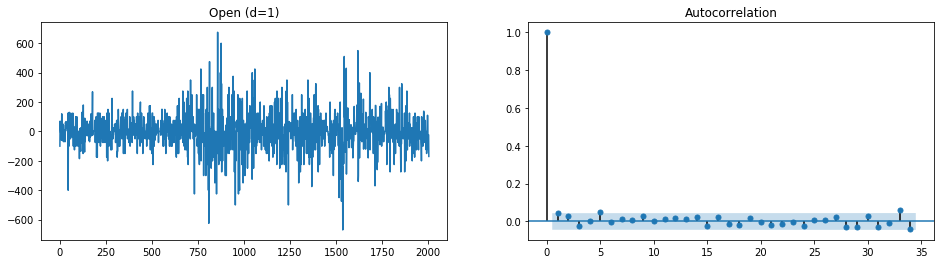

In [99]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Open'].diff().dropna())
ax1.set_title('Open (d=1)')
plot_acf(df['Open'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai q term pada ARIMA. Pada model ini, akan digunakan q = 5.

#### ARIMA Model

Dari analisis sebelumnya, akan digunakan model ARIMA untuk melakukan fitting terhadap data asli Positif Harian dengan parameter:
- ARIMA(p,d,q) = ARIMA(3,1,5)

In [102]:
model = ARIMA(df['Open'], order=(3,1,5))
result = model.fit()

In [103]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 2004
Model:                 ARIMA(3, 1, 5)   Log Likelihood              -12202.732
Date:                Sat, 11 Dec 2021   AIC                          24423.463
Time:                        23:30:26   BIC                          24473.885
Sample:                             0   HQIC                         24441.976
                               - 2004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1107      0.305      0.362      0.717      -0.488       0.709
ar.L2          0.5078      0.242      2.103      0.036       0.034       0.981
ar.L3          0.1101      0.295      0.373      0.7

### Model Fitting

In [114]:
df_dummy = df.copy()

In [115]:
df_dummy['forecast'] = result.predict(start=1, end=2003, typ='levels')
df_dummy['Error'] = df_dummy['Open'] - df_dummy['forecast']

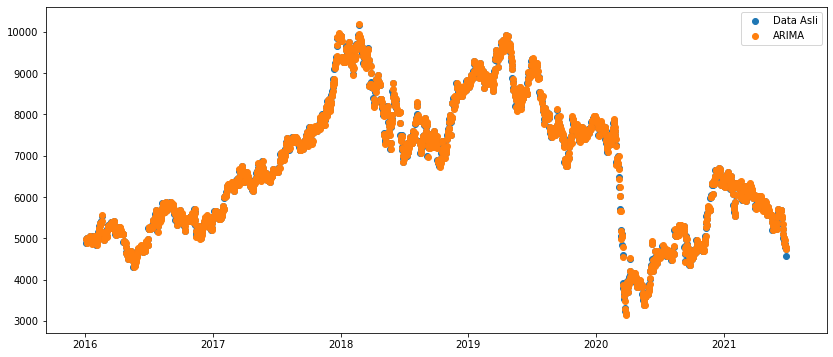

In [116]:
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Open'], label='Data Asli')
ax.scatter(df_dummy['Date'], df_dummy['forecast'], label='ARIMA')
plt.legend()

Dari visualisasi di atas, diperoleh hasil fitting dan prediksi model ARIMA terhadap data asli. Hasil forecast ARIMA (oranye) akan dijadikan sebagai ground truth data 'normal' dalam pencarian outliers. Error selisih prediksi ARIMA dengan data asli dapat dilihat pada visualisasi berikut:

Text(0.5, 1.0, 'Residual Error')

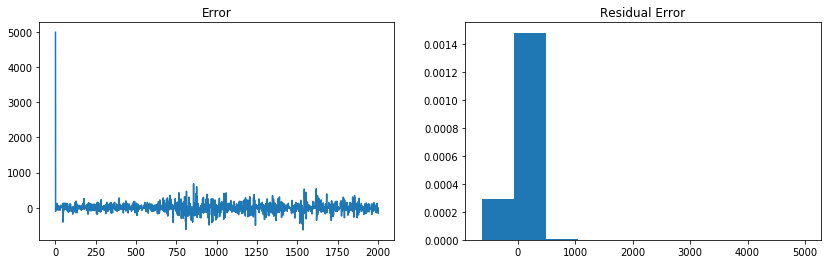

In [117]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
ax1.plot(result.resid)
ax1.set_title('Error')
ax2.hist(result.resid, density=True)
ax2.set_title('Residual Error')

In [118]:
result.resid.skew()

16.769905082491704

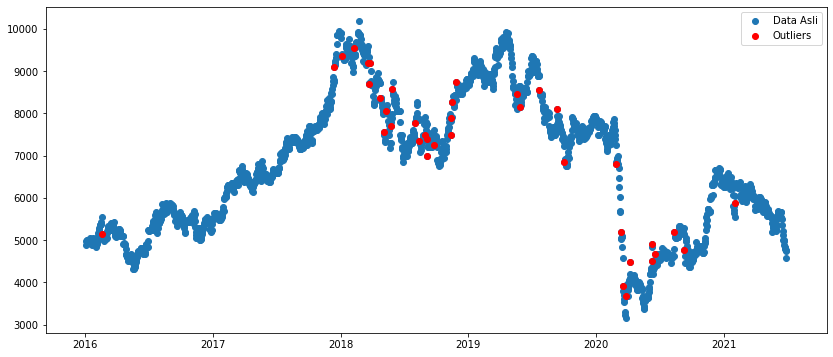

In [119]:
# Menggunakan Z-Score dengan batas 3 std

up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Open'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Open'][out_index], c='Red', label='Outliers')
plt.legend()

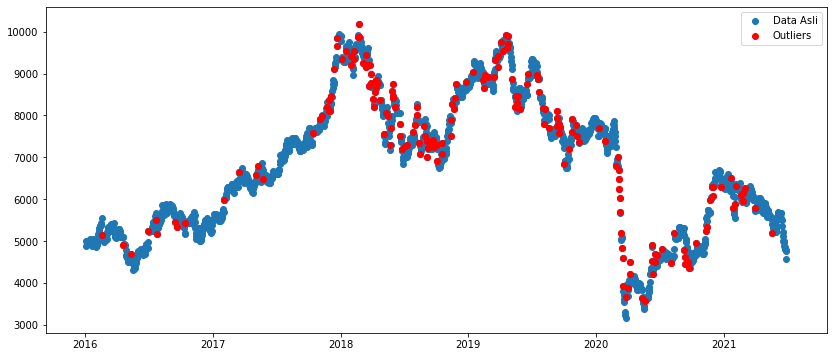

In [120]:
# Menggunakan Tukey's Fence dengan batas 1.5 Interquartile Range (IQR)

IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Open'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Open'][out_index], c='Red', label='Outliers')
plt.legend()

Diperoleh hasil metode deteksi anomali dengan Z-Score memberikan hasil yang lebih mild (moderat) dibandingkan Tukey's Fence yang terlihat lebih ketat dalam memberikan threshold anomali.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


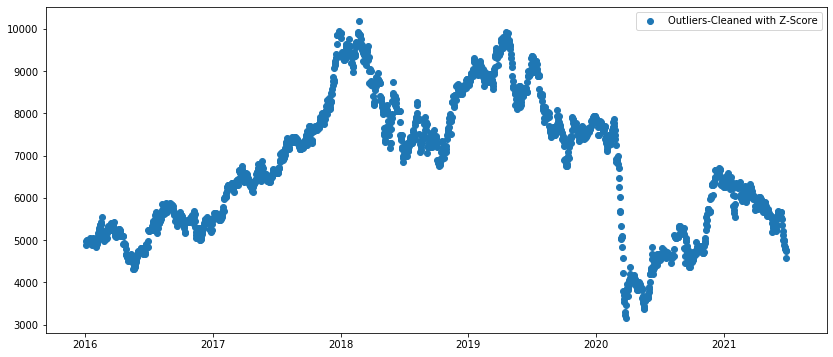

In [121]:
up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas Z-Score = +/- 3
df_dummy_z = df_dummy.copy()
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_z['Open'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_z['Open'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_z['Date'], df_dummy_z['Open'], label='Outliers-Cleaned with Z-Score')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


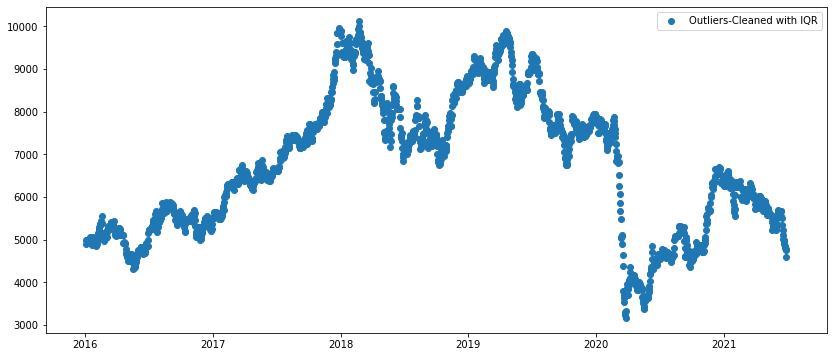

In [122]:
IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas 1.5 IQR
df_dummy_iqr = df_dummy.copy()
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_iqr['Open'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_iqr['Open'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_iqr['Date'], df_dummy_iqr['Open'], label='Outliers-Cleaned with IQR')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

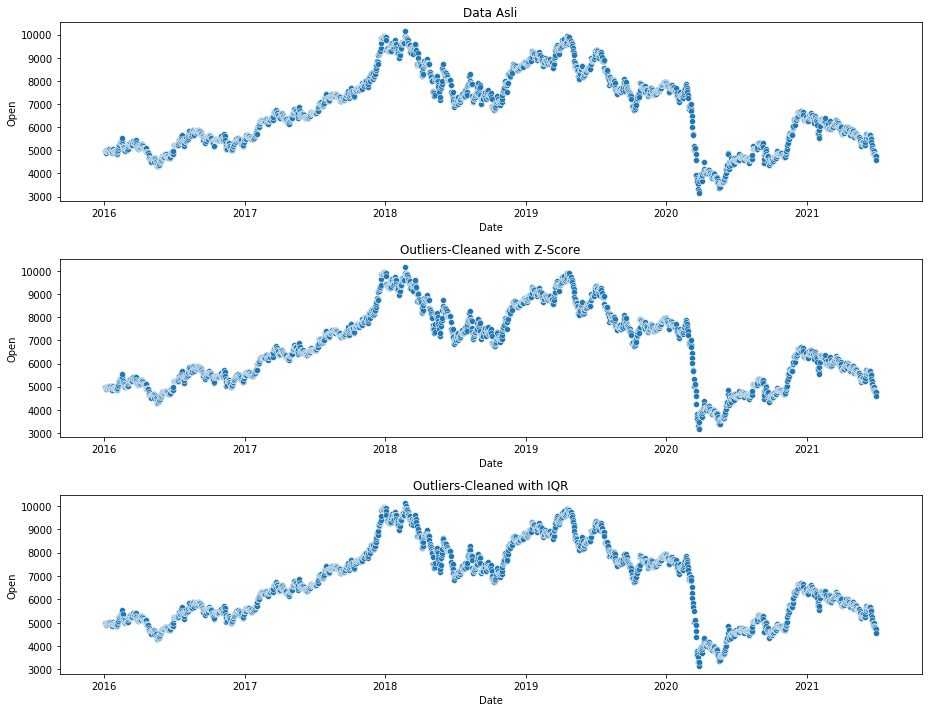

In [123]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(13,10))

sns.scatterplot(df_dummy['Date'], df_dummy['Open'], ax=ax1)
ax1.set_title('Data Asli')

sns.scatterplot(df_dummy_z['Date'], df_dummy_z['Open'], ax=ax2)
ax2.set_title('Outliers-Cleaned with Z-Score')

sns.scatterplot(df_dummy_iqr['Date'], df_dummy_iqr['Open'], ax=ax3)
ax3.set_title('Outliers-Cleaned with IQR')

plt.tight_layout()

### 2) High

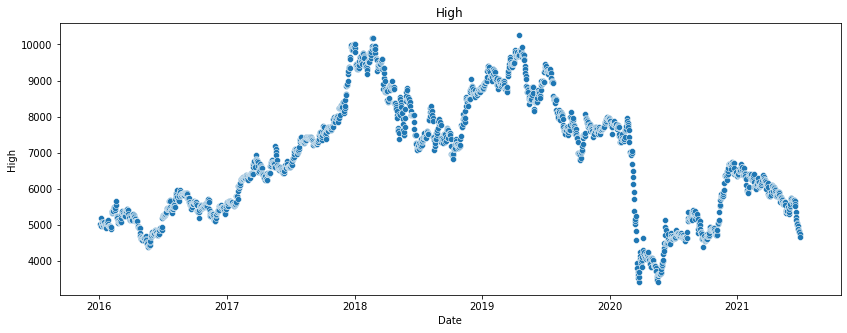

In [124]:
fig, (ax1) = plt.subplots(1,figsize=(14,5))
plt.title('High')
sns.scatterplot(x=df['Date'], y=df['High'])

#### Anomaly Detection - ARIMA

ARIMA mensyaratkan data time series untuk memiliki sifat stasioner, yaitu karakteristik data hanya bergantung pada selisih (difference) dari suatu selang waktu, bukan tergantung pada kapan selang waktu tersebut terjadi. Untuk itu, data dapat dikatakan stasioner jika memiliki karakteristik:
1. Mean dan varians yang stabil 
2. Tidak memiliki trend
3. Tidak memiliki seasonality

In [125]:
from statsmodels.tsa.stattools import adfuller

def adfullertest(data):
    result = adfuller(data)
    print(f'ADF Statistics: {result[0]}')
    print(f'p-Value: {result[1]}')
    if result[1] < 0.05:
        print('Stationary')
    else:
        print('Non-Stationary')

Augmented Dickey-Fuller (ADF test) merupakan pengujian statistik untuk mengukur stationarity data. Pengujian ini memiliki hipotesis nol (H0) bahwa data tidak stasioner. Umumnya jika p-value < 0.05, maka dianggap telah cukup bukti untuk menolak H0 dan menerima H1 bahwa data telah memiliki sifat stasioner.

In [126]:
adfullertest(df['High'])

ADF Statistics: -1.4975363307450955
p-Value: 0.5347297269020864
Non-Stationary


Hasil ADF Test menunjukkan p-value > 0.05. Dari nilai ini dapat ditarik kesimpulan bahwa data masih sangat jauh dari sifat stasioner untuk dapat dijadikan sebagai input ARIMA. Untuk itu, akan digunakan teknik differencing untuk menghilangkan trend dari data dan sekaligus membuat data menjadi lebih stasioner.

#### Differencing Technique

In [127]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

#### Data Asli

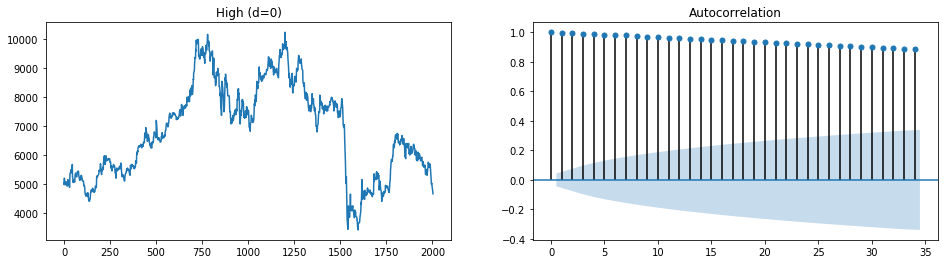

In [128]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['High'])
ax1.set_title('High (d=0)')
plot_acf(df['High'], ax=ax2);

Dari visualisasi, mudah terlihat bahwa data asli masih jauh dari sifat stasioner.

#### First Order Differencing (d=1)

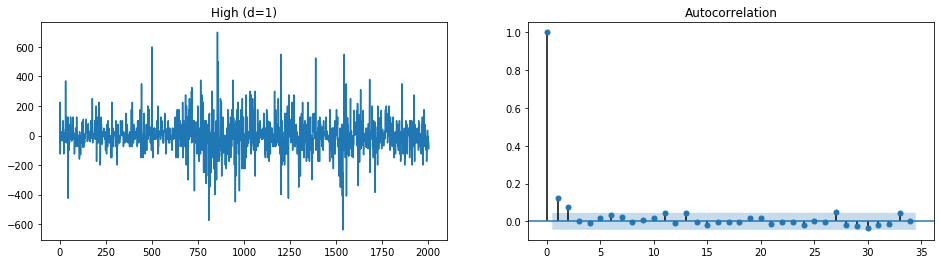

In [129]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['High'].diff().dropna())
ax1.set_title('High (d=1)')
plot_acf(df['High'].diff().dropna(), ax=ax2);

Penggunaan teknik differencing sebanyak satu kali terlihat telah berhasil menekan trend dari data dan membuat data menjadi lebih stabil. Selanjutnya dapat diperiksa penggunaan differencing sebanyak dua kali untuk melihat apakah ada perbaikan lebih lanjut yang signifikan.

#### Second Order Differencing (d=2)

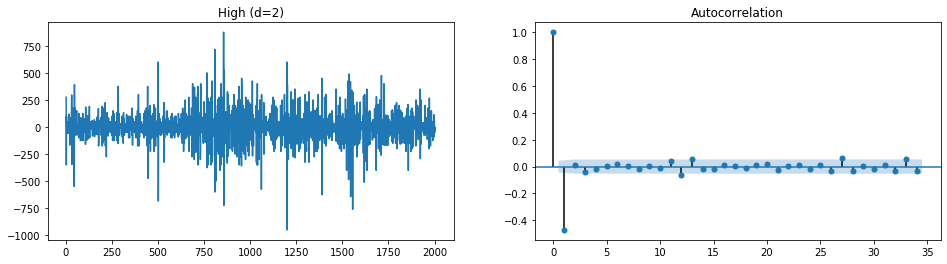

In [130]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['High'].diff().diff().dropna())
ax1.set_title('High (d=2)')
plot_acf(df['High'].diff().diff().dropna(), ax=ax2);

Terlihat bahwa differencing sebanyak dua kali tidak terlalu membawa perubahan berarti pada data yang dilakukan differencing sebanyak satu kali. Dari informasi ini, akan digunakan parameter differencing ARIMA d=1. Hasil tersebut juga didukung oleh hasil pencarian otomatis jumlah diferensiasi (ndiffs) menggunakan library pmdarima berikut:

In [131]:
from pmdarima.arima.utils import ndiffs

ndiff = ndiffs(df['High'], test='adf')
print(f'Differencing coefficient d = {ndiff}')

Differencing coefficient d = 1


#### Autoregression (AR) Parameter

Parameter Autoregression (p) pada ARIMA merupakan jumlah lags yang digunakan ARIMA untuk melakukan prediksi. Dengan kata lain, parameter ini menunjukkan seberapa jauh ARIMA akan meihat past values untuk melakukan prediksi terhadap data baru. Untuk menentukannya dapat digunakan analisis Partial Autocorrelation Function (PACF).

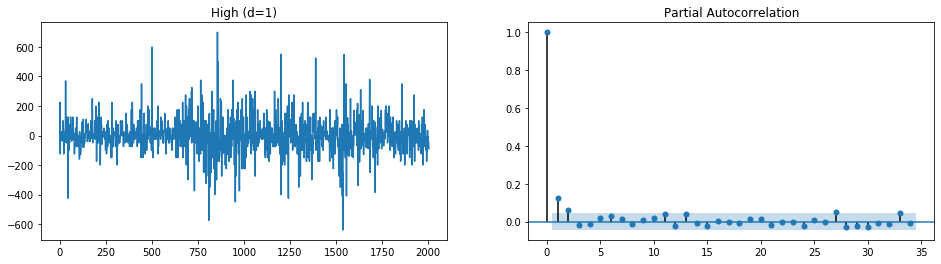

In [132]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['High'].diff().dropna())
ax1.set_title('High (d=1)')
plot_pacf(df['High'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai p term pada ARIMA. Pada model ini, akan digunakan p = 2.

#### Moving Average (MA) Parameter

Parameter Moving Average (q) pada ARIMA menunjukkan seberapa jauh error lags yang dipertimbangkan untuk melakukan prediksi. Parameter ini dapat ditentukan dengan menggunakan analisis Autocorrelation Function (ACF).

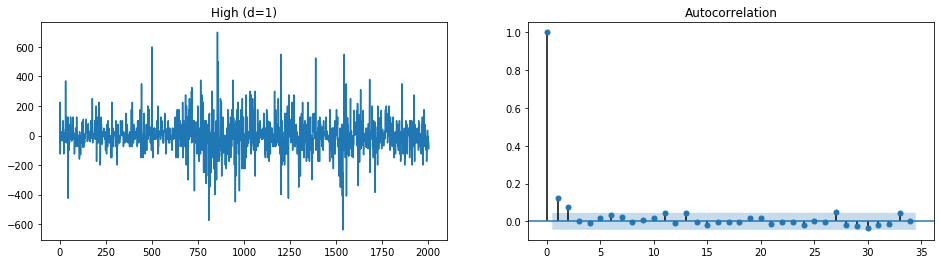

In [133]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['High'].diff().dropna())
ax1.set_title('High (d=1)')
plot_acf(df['High'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai q term pada ARIMA. Pada model ini, akan digunakan q = 2.

#### ARIMA Model

Dari analisis sebelumnya, akan digunakan model ARIMA untuk melakukan fitting terhadap data asli Positif Harian dengan parameter:
- ARIMA(p,d,q) = ARIMA(2,1,2)

In [146]:
model = ARIMA(df['High'], order=(2,1,2))
result = model.fit()

In [147]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                 2004
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -11993.417
Date:                Sat, 11 Dec 2021   AIC                          23996.833
Time:                        23:33:17   BIC                          24024.845
Sample:                             0   HQIC                         24007.118
                               - 2004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2878      0.337      0.854      0.393      -0.373       0.948
ar.L2         -0.2721      0.196     -1.387      0.165      -0.657       0.112
ma.L1         -0.1730      0.336     -0.514      0.6

### Model Fitting

In [148]:
df_dummy['forecast'] = result.predict(start=1, end=2003, typ='levels')
df_dummy['Error'] = df_dummy['High'] - df_dummy['forecast']

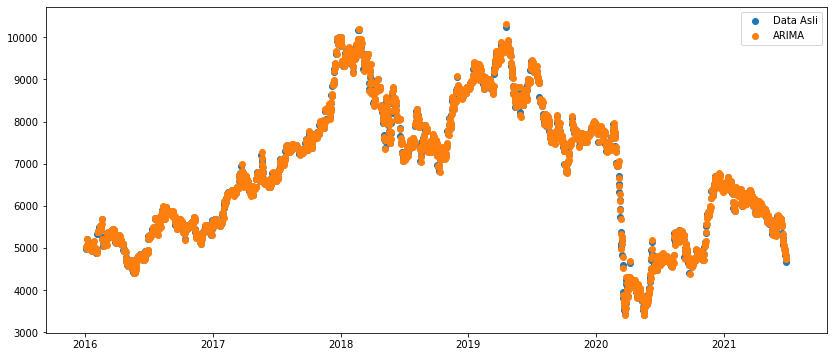

In [149]:
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['High'], label='Data Asli')
ax.scatter(df_dummy['Date'], df_dummy['forecast'], label='ARIMA')
plt.legend()

Dari visualisasi di atas, diperoleh hasil fitting dan prediksi model ARIMA terhadap data asli. Hasil forecast ARIMA (oranye) akan dijadikan sebagai ground truth data 'normal' dalam pencarian outliers. Error selisih prediksi ARIMA dengan data asli dapat dilihat pada visualisasi berikut:

Text(0.5, 1.0, 'Residual Error')

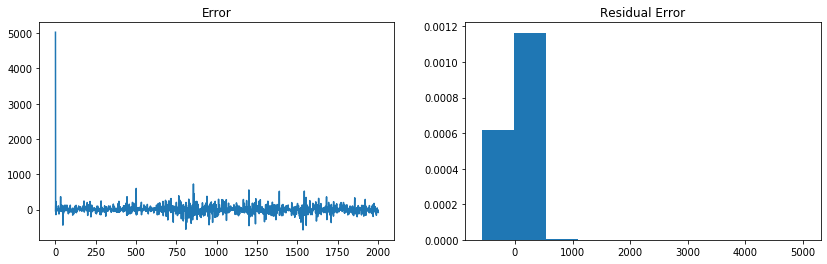

In [150]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
ax1.plot(result.resid)
ax1.set_title('Error')
ax2.hist(result.resid, density=True)
ax2.set_title('Residual Error')

In [151]:
result.resid.skew()

19.57218096923723

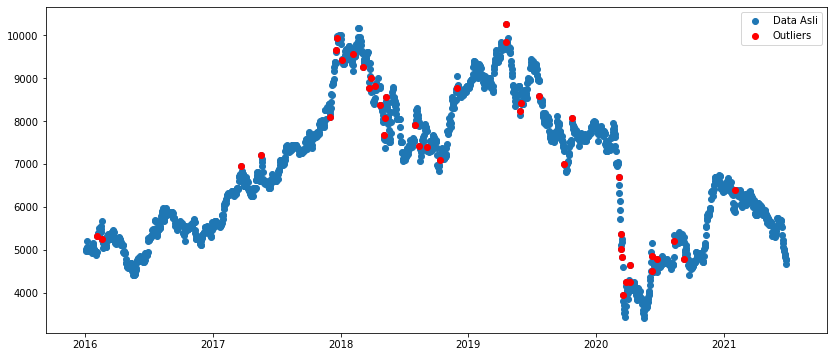

In [152]:
# Menggunakan Z-Score dengan batas 3 std

up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['High'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['High'][out_index], c='Red', label='Outliers')
plt.legend()

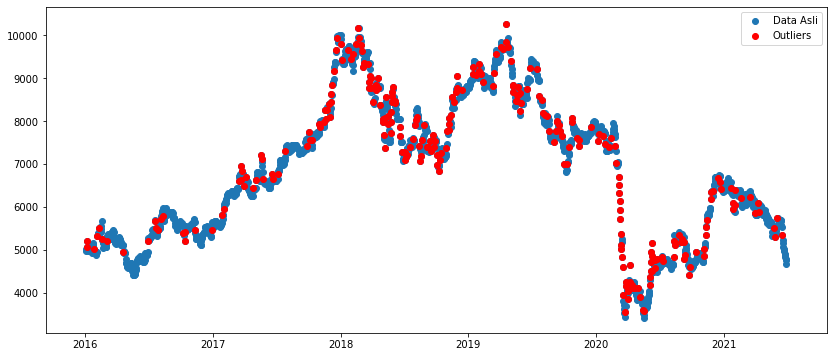

In [153]:
# Menggunakan Tukey's Fence dengan batas 1.5 Interquartile Range (IQR)

IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['High'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['High'][out_index], c='Red', label='Outliers')
plt.legend()

Diperoleh hasil metode deteksi anomali dengan Z-Score memberikan hasil yang lebih mild (moderat) dibandingkan Tukey's Fence yang terlihat lebih ketat dalam memberikan threshold anomali.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


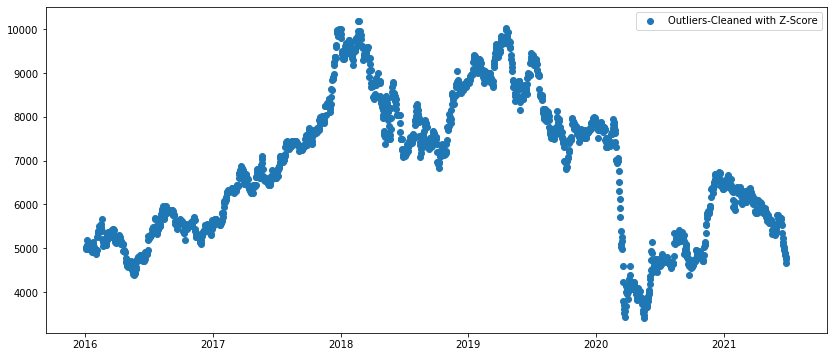

In [154]:
up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas Z-Score = +/- 3
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_z['High'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_z['High'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_z['Date'], df_dummy_z['High'], label='Outliers-Cleaned with Z-Score')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


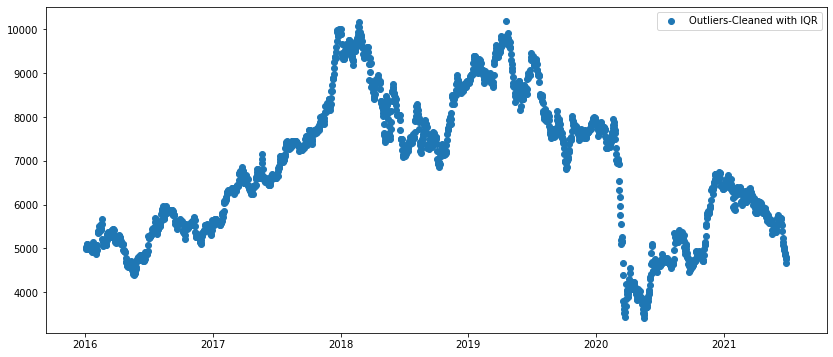

In [155]:
IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas 1.5 IQR
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_iqr['High'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_iqr['High'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_iqr['Date'], df_dummy_iqr['High'], label='Outliers-Cleaned with IQR')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

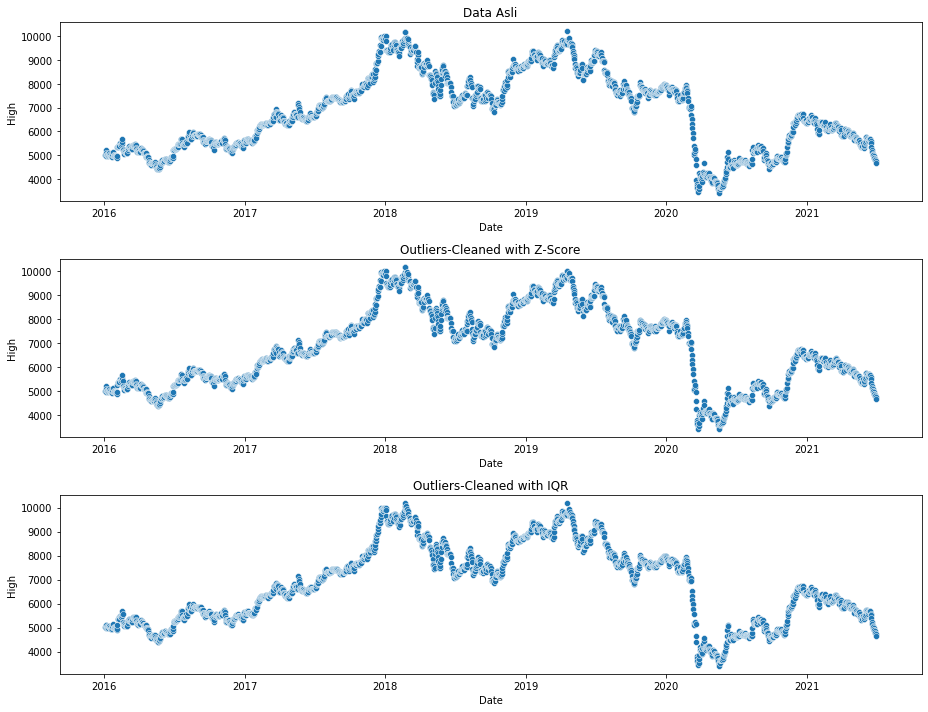

In [156]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(13,10))

sns.scatterplot(df_dummy['Date'], df_dummy['High'], ax=ax1)
ax1.set_title('Data Asli')

sns.scatterplot(df_dummy_z['Date'], df_dummy_z['High'], ax=ax2)
ax2.set_title('Outliers-Cleaned with Z-Score')

sns.scatterplot(df_dummy_iqr['Date'], df_dummy_iqr['High'], ax=ax3)
ax3.set_title('Outliers-Cleaned with IQR')

plt.tight_layout()

### 3) Low

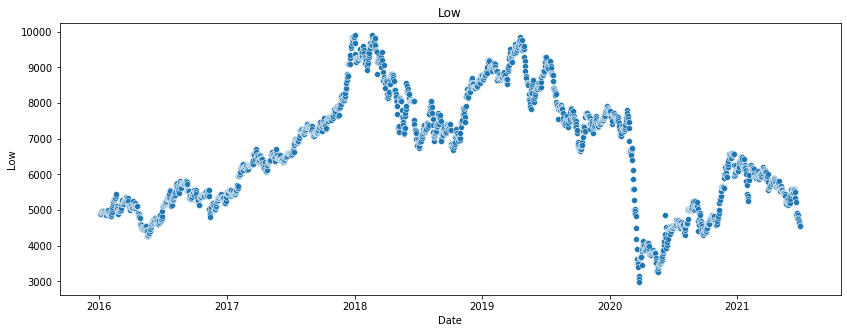

In [157]:
fig, (ax1) = plt.subplots(1,figsize=(14,5))
plt.title('Low')
sns.scatterplot(x=df['Date'], y=df['Low'])

#### Anomaly Detection - ARIMA

ARIMA mensyaratkan data time series untuk memiliki sifat stasioner, yaitu karakteristik data hanya bergantung pada selisih (difference) dari suatu selang waktu, bukan tergantung pada kapan selang waktu tersebut terjadi. Untuk itu, data dapat dikatakan stasioner jika memiliki karakteristik:
1. Mean dan varians yang stabil 
2. Tidak memiliki trend
3. Tidak memiliki seasonality

In [158]:
from statsmodels.tsa.stattools import adfuller

def adfullertest(data):
    result = adfuller(data)
    print(f'ADF Statistics: {result[0]}')
    print(f'p-Value: {result[1]}')
    if result[1] < 0.05:
        print('Stationary')
    else:
        print('Non-Stationary')

Augmented Dickey-Fuller (ADF test) merupakan pengujian statistik untuk mengukur stationarity data. Pengujian ini memiliki hipotesis nol (H0) bahwa data tidak stasioner. Umumnya jika p-value < 0.05, maka dianggap telah cukup bukti untuk menolak H0 dan menerima H1 bahwa data telah memiliki sifat stasioner.

In [159]:
adfullertest(df['Low'])

ADF Statistics: -1.5433957587138527
p-Value: 0.5119453876549583
Non-Stationary


Hasil ADF Test menunjukkan p-value > 0.05. Dari nilai ini dapat ditarik kesimpulan bahwa data masih sangat jauh dari sifat stasioner untuk dapat dijadikan sebagai input ARIMA. Untuk itu, akan digunakan teknik differencing untuk menghilangkan trend dari data dan sekaligus membuat data menjadi lebih stasioner.

#### Differencing Technique

In [160]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

#### Data Asli

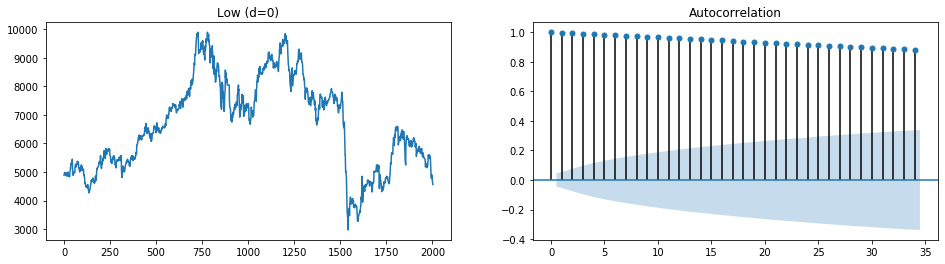

In [161]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Low'])
ax1.set_title('Low (d=0)')
plot_acf(df['Low'], ax=ax2);

Dari visualisasi, mudah terlihat bahwa data asli masih jauh dari sifat stasioner.

#### First Order Differencing (d=1)

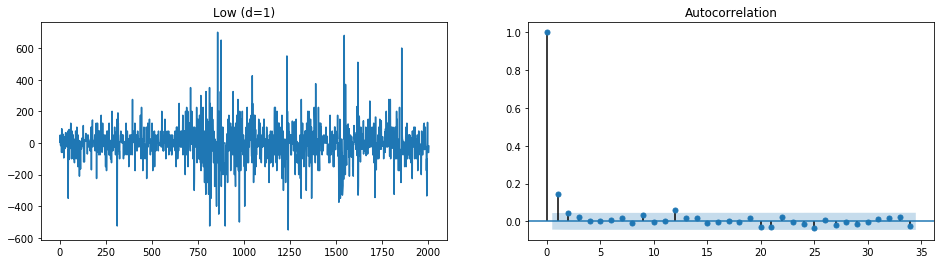

In [162]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Low'].diff().dropna())
ax1.set_title('Low (d=1)')
plot_acf(df['Low'].diff().dropna(), ax=ax2);

Penggunaan teknik differencing sebanyak satu kali terlihat telah berhasil menekan trend dari data dan membuat data menjadi lebih stabil. Selanjutnya dapat diperiksa penggunaan differencing sebanyak dua kali untuk melihat apakah ada perbaikan lebih lanjut yang signifikan.

#### Second Order Differencing (d=2)

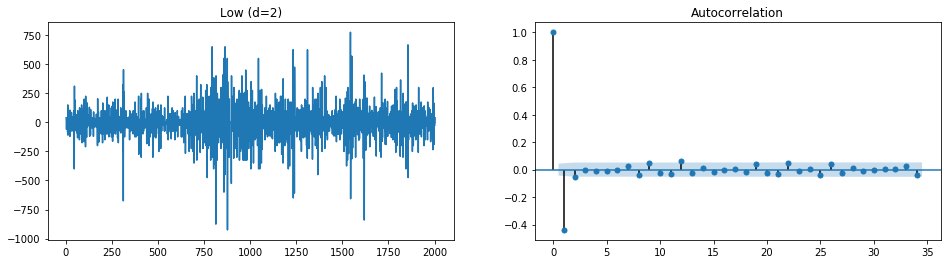

In [163]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Low'].diff().diff().dropna())
ax1.set_title('Low (d=2)')
plot_acf(df['Low'].diff().diff().dropna(), ax=ax2);

Terlihat bahwa differencing sebanyak dua kali tidak terlalu membawa perubahan berarti pada data yang dilakukan differencing sebanyak satu kali. Dari informasi ini, akan digunakan parameter differencing ARIMA d=1. Hasil tersebut juga didukung oleh hasil pencarian otomatis jumlah diferensiasi (ndiffs) menggunakan library pmdarima berikut:

In [164]:
from pmdarima.arima.utils import ndiffs

ndiff = ndiffs(df['Low'], test='adf')
print(f'Differencing coefficient d = {ndiff}')

Differencing coefficient d = 1


#### Autoregression (AR) Parameter

Parameter Autoregression (p) pada ARIMA merupakan jumlah lags yang digunakan ARIMA untuk melakukan prediksi. Dengan kata lain, parameter ini menunjukkan seberapa jauh ARIMA akan meihat past values untuk melakukan prediksi terhadap data baru. Untuk menentukannya dapat digunakan analisis Partial Autocorrelation Function (PACF).

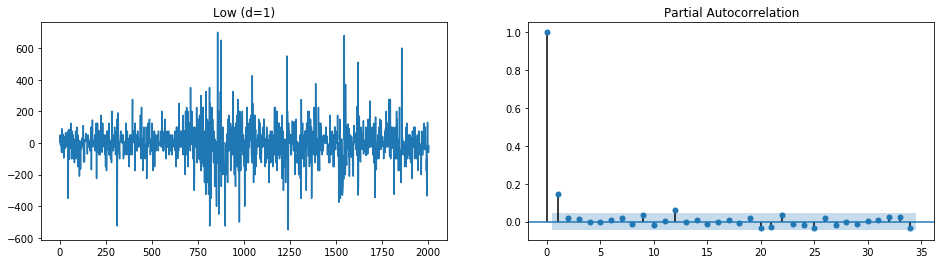

In [165]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Low'].diff().dropna())
ax1.set_title('Low (d=1)')
plot_pacf(df['Low'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai p term pada ARIMA. Pada model ini, akan digunakan p = 1.

#### Moving Average (MA) Parameter

Parameter Moving Average (q) pada ARIMA menunjukkan seberapa jauh error lags yang dipertimbangkan untuk melakukan prediksi. Parameter ini dapat ditentukan dengan menggunakan analisis Autocorrelation Function (ACF).

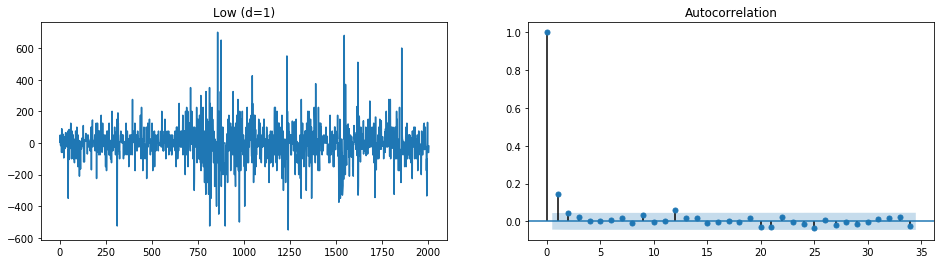

In [166]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Low'].diff().dropna())
ax1.set_title('Low (d=1)')
plot_acf(df['Low'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai q term pada ARIMA. Pada model ini, akan digunakan q = 2.

#### ARIMA Model

Dari analisis sebelumnya, akan digunakan model ARIMA untuk melakukan fitting terhadap data asli Positif Harian dengan parameter:
- ARIMA(p,d,q) = ARIMA(1,1,2)

In [168]:
model = ARIMA(df['Low'], order=(1,1,2))
result = model.fit()

In [169]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                    Low   No. Observations:                 2004
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -12035.044
Date:                Sat, 11 Dec 2021   AIC                          24078.088
Time:                        23:34:31   BIC                          24100.497
Sample:                             0   HQIC                         24086.315
                               - 2004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4754      0.343      1.388      0.165      -0.196       1.147
ma.L1         -0.3321      0.345     -0.963      0.336      -1.008       0.344
ma.L2         -0.0279      0.058     -0.484      0.6

### Model Fitting

In [170]:
df_dummy['forecast'] = result.predict(start=1, end=2003, typ='levels')
df_dummy['Error'] = df_dummy['Low'] - df_dummy['forecast']

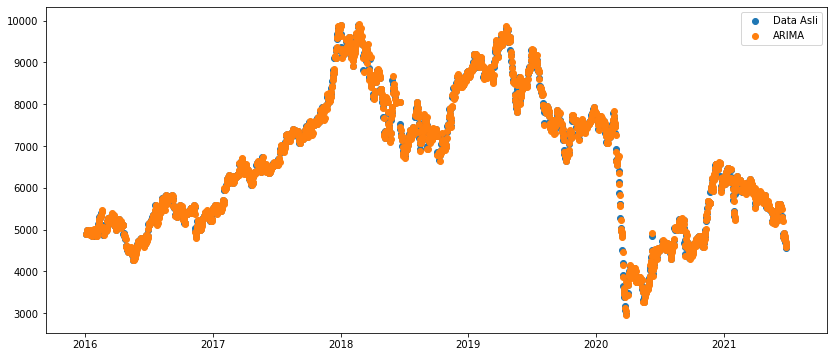

In [171]:
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Low'], label='Data Asli')
ax.scatter(df_dummy['Date'], df_dummy['forecast'], label='ARIMA')
plt.legend()

Dari visualisasi di atas, diperoleh hasil fitting dan prediksi model ARIMA terhadap data asli. Hasil forecast ARIMA (oranye) akan dijadikan sebagai ground truth data 'normal' dalam pencarian outliers. Error selisih prediksi ARIMA dengan data asli dapat dilihat pada visualisasi berikut:

Text(0.5, 1.0, 'Residual Error')

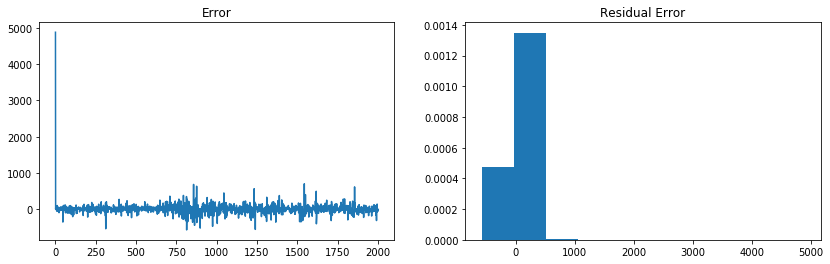

In [172]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
ax1.plot(result.resid)
ax1.set_title('Error')
ax2.hist(result.resid, density=True)
ax2.set_title('Residual Error')

In [173]:
result.resid.skew()

18.318546779642965

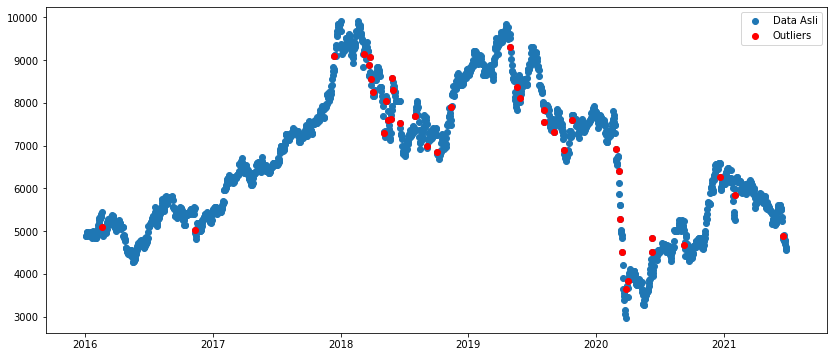

In [174]:
# Menggunakan Z-Score dengan batas 3 std

up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Low'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Low'][out_index], c='Red', label='Outliers')
plt.legend()

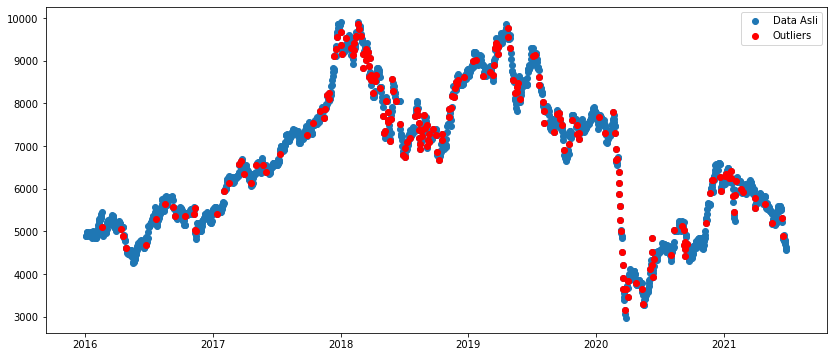

In [175]:
# Menggunakan Tukey's Fence dengan batas 1.5 Interquartile Range (IQR)

IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Low'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Low'][out_index], c='Red', label='Outliers')
plt.legend()

Diperoleh hasil metode deteksi anomali dengan Z-Score memberikan hasil yang lebih mild (moderat) dibandingkan Tukey's Fence yang terlihat lebih ketat dalam memberikan threshold anomali.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


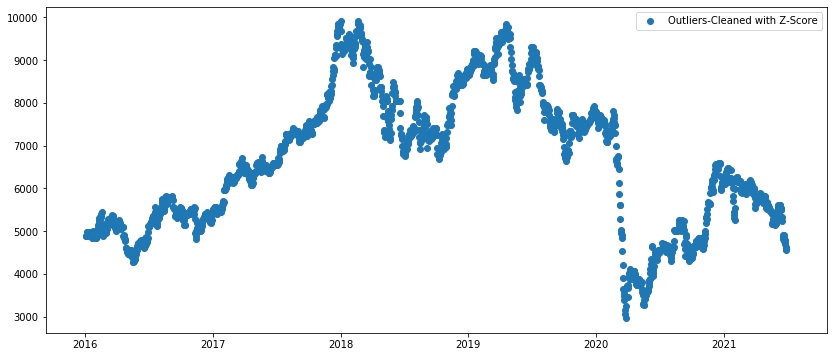

In [176]:
up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas Z-Score = +/- 3
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_z['Low'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_z['Low'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_z['Date'], df_dummy_z['Low'], label='Outliers-Cleaned with Z-Score')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


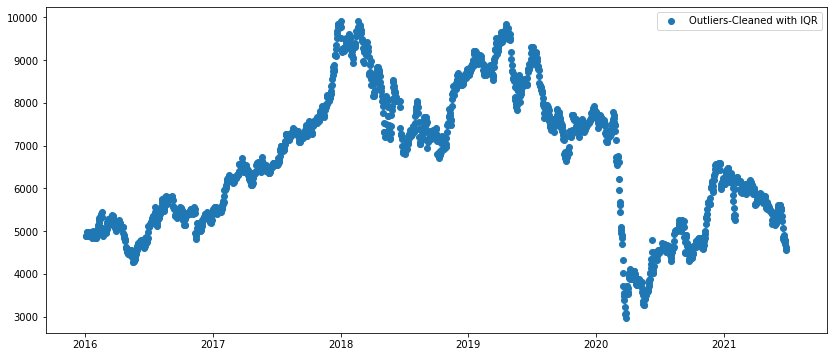

In [177]:
IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas 1.5 IQR
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_iqr['Low'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_iqr['Low'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_iqr['Date'], df_dummy_iqr['Low'], label='Outliers-Cleaned with IQR')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

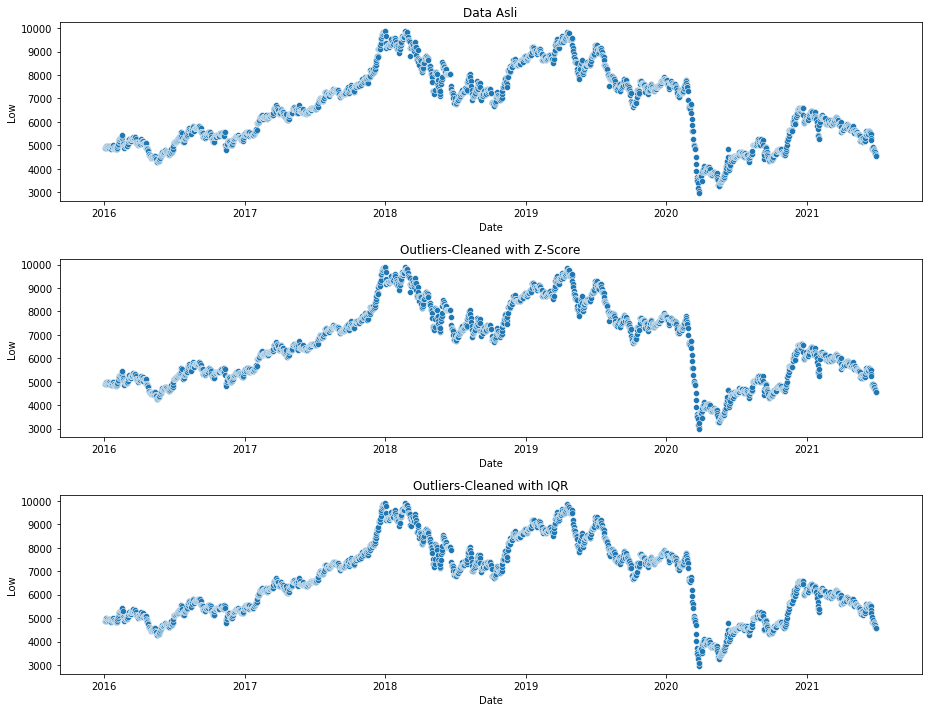

In [178]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(13,10))

sns.scatterplot(df_dummy['Date'], df_dummy['Low'], ax=ax1)
ax1.set_title('Data Asli')

sns.scatterplot(df_dummy_z['Date'], df_dummy_z['Low'], ax=ax2)
ax2.set_title('Outliers-Cleaned with Z-Score')

sns.scatterplot(df_dummy_iqr['Date'], df_dummy_iqr['Low'], ax=ax3)
ax3.set_title('Outliers-Cleaned with IQR')

plt.tight_layout()

### 4) Volume

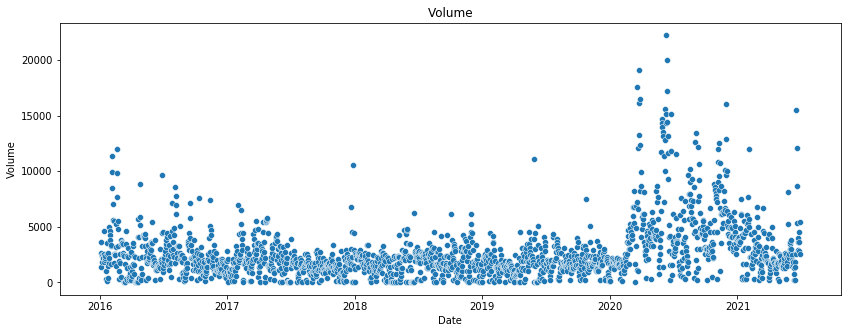

In [179]:
fig, (ax1) = plt.subplots(1,figsize=(14,5))
plt.title('Volume')
sns.scatterplot(x=df['Date'], y=df['Volume'])

#### Anomaly Detection - ARIMA

ARIMA mensyaratkan data time series untuk memiliki sifat stasioner, yaitu karakteristik data hanya bergantung pada selisih (difference) dari suatu selang waktu, bukan tergantung pada kapan selang waktu tersebut terjadi. Untuk itu, data dapat dikatakan stasioner jika memiliki karakteristik:
1. Mean dan varians yang stabil 
2. Tidak memiliki trend
3. Tidak memiliki seasonality

In [180]:
from statsmodels.tsa.stattools import adfuller

def adfullertest(data):
    result = adfuller(data)
    print(f'ADF Statistics: {result[0]}')
    print(f'p-Value: {result[1]}')
    if result[1] < 0.05:
        print('Stationary')
    else:
        print('Non-Stationary')

Augmented Dickey-Fuller (ADF test) merupakan pengujian statistik untuk mengukur stationarity data. Pengujian ini memiliki hipotesis nol (H0) bahwa data tidak stasioner. Umumnya jika p-value < 0.05, maka dianggap telah cukup bukti untuk menolak H0 dan menerima H1 bahwa data telah memiliki sifat stasioner.

In [181]:
adfullertest(df['Volume'])

ADF Statistics: -4.259638997425842
p-Value: 0.0005213972289114424
Stationary


Hasil ADF Test menunjukkan p-value < 0.05. Dari nilai ini dapat ditarik kesimpulan bahwa data sudah bersifat stasioner. Hasil tersebut juga didukung oleh hasil pencarian otomatis jumlah diferensiasi (ndiffs) menggunakan library pmdarima berikut:

In [182]:
from pmdarima.arima.utils import ndiffs

ndiff = ndiffs(df['Volume'], test='adf')
print(f'Differencing coefficient d = {ndiff}')

Differencing coefficient d = 0


#### Autoregression (AR) Parameter

Parameter Autoregression (p) pada ARIMA merupakan jumlah lags yang digunakan ARIMA untuk melakukan prediksi. Dengan kata lain, parameter ini menunjukkan seberapa jauh ARIMA akan meihat past values untuk melakukan prediksi terhadap data baru. Untuk menentukannya dapat digunakan analisis Partial Autocorrelation Function (PACF).

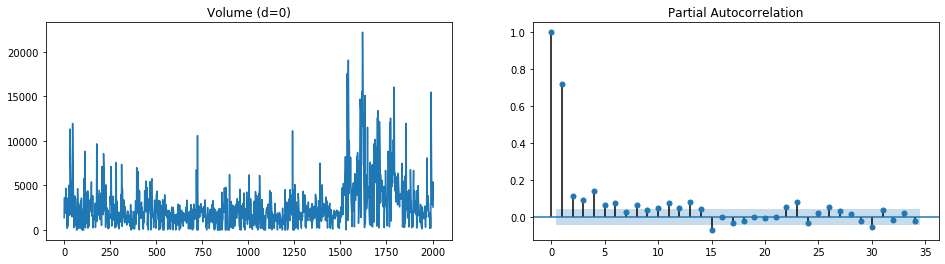

In [183]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Volume'].dropna())
ax1.set_title('Volume (d=0)')
plot_pacf(df['Volume'].dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai p term pada ARIMA. Pada model ini, akan digunakan p = 3.

#### Moving Average (MA) Parameter

Parameter Moving Average (q) pada ARIMA menunjukkan seberapa jauh error lags yang dipertimbangkan untuk melakukan prediksi. Parameter ini dapat ditentukan dengan menggunakan analisis Autocorrelation Function (ACF).

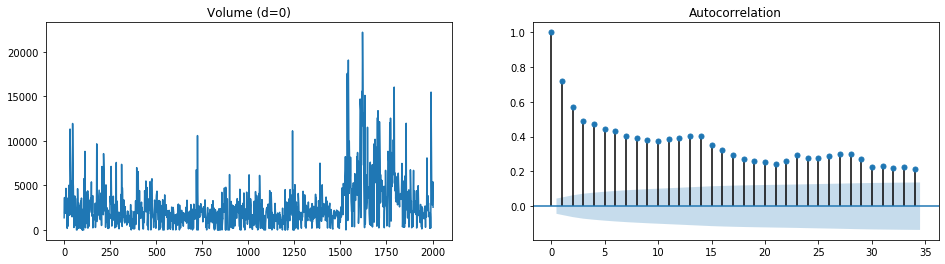

In [184]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Volume'].dropna())
ax1.set_title('Volume (d=0)')
plot_acf(df['Volume'].dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai q term pada ARIMA. Pada model ini, akan digunakan q = 3.

#### ARIMA Model

Dari analisis sebelumnya, akan digunakan model ARIMA untuk melakukan fitting terhadap data asli Positif Harian dengan parameter:
- ARIMA(p,d,q) = ARIMA(3,0,3)

In [187]:
model = ARIMA(df['Volume'], order=(3,0,3))
result = model.fit()

In [188]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                 2004
Model:                 ARIMA(3, 0, 3)   Log Likelihood              -17695.905
Date:                Sat, 11 Dec 2021   AIC                          35407.810
Time:                        23:35:47   BIC                          35452.634
Sample:                             0   HQIC                         35424.267
                               - 2004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2614.3877    475.903      5.494      0.000    1681.635    3547.141
ar.L1          0.5705      0.105      5.433      0.000       0.365       0.776
ar.L2          0.6959      0.160      4.355      0.0

### Model Fitting

In [193]:
df_dummy['forecast'] = result.predict(start=1, end=2003, typ='levels')
df_dummy['Error'] = df_dummy['Volume'] - df_dummy['forecast']

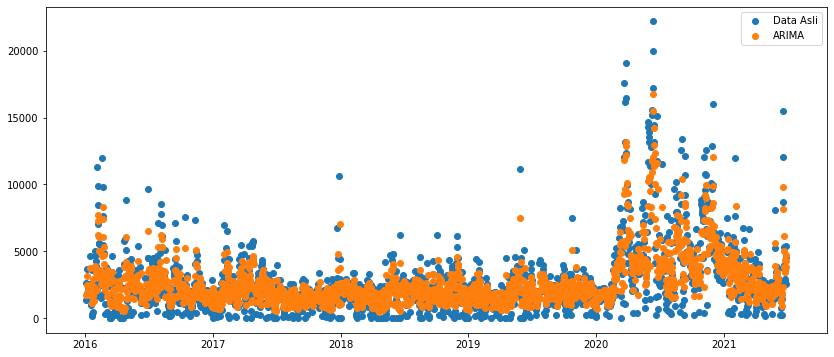

In [194]:
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Volume'], label='Data Asli')
ax.scatter(df_dummy['Date'], df_dummy['forecast'], label='ARIMA')
plt.legend()

Dari visualisasi di atas, diperoleh hasil fitting dan prediksi model ARIMA terhadap data asli. Hasil forecast ARIMA (oranye) akan dijadikan sebagai ground truth data 'normal' dalam pencarian outliers. Error selisih prediksi ARIMA dengan data asli dapat dilihat pada visualisasi berikut:

Text(0.5, 1.0, 'Residual Error')

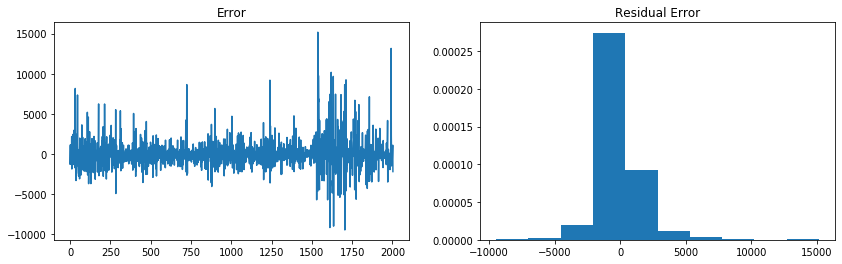

In [195]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
ax1.plot(result.resid)
ax1.set_title('Error')
ax2.hist(result.resid, density=True)
ax2.set_title('Residual Error')

In [196]:
result.resid.skew()

1.5769058087241667

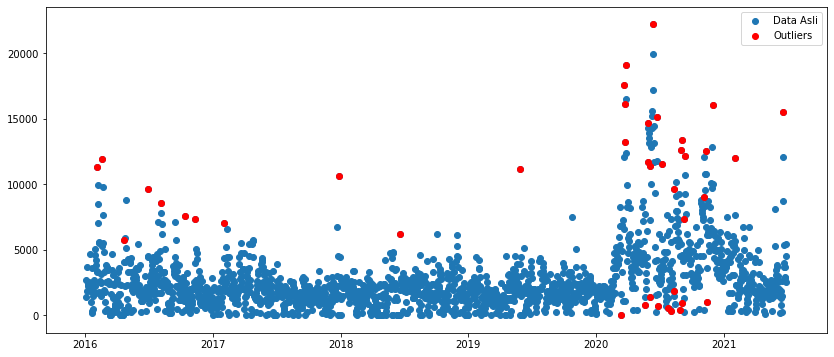

In [197]:
# Menggunakan Z-Score dengan batas 3 std

up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Volume'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Volume'][out_index], c='Red', label='Outliers')
plt.legend()

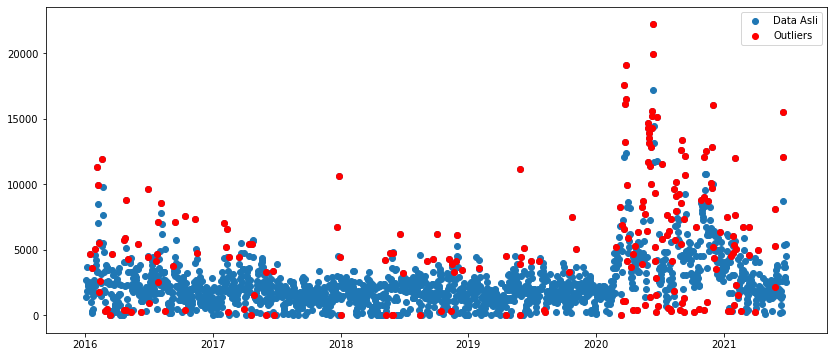

In [198]:
# Menggunakan Tukey's Fence dengan batas 1.5 Interquartile Range (IQR)

IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Volume'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Volume'][out_index], c='Red', label='Outliers')
plt.legend()

Diperoleh hasil metode deteksi anomali dengan Z-Score memberikan hasil yang lebih mild (moderat) dibandingkan Tukey's Fence yang terlihat lebih ketat dalam memberikan threshold anomali.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


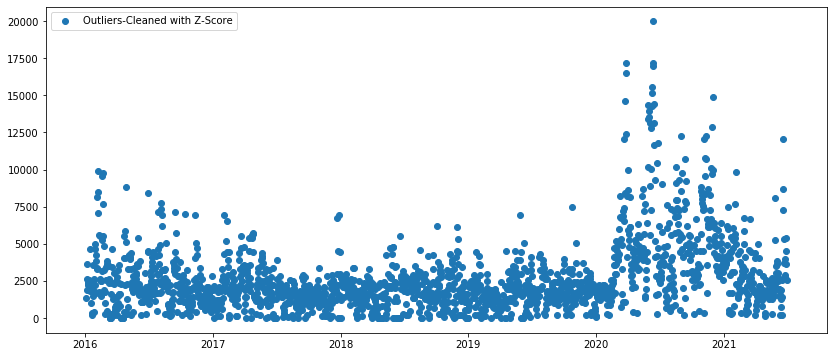

In [199]:
up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas Z-Score = +/- 3
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_z['Volume'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_z['Volume'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_z['Date'], df_dummy_z['Volume'], label='Outliers-Cleaned with Z-Score')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


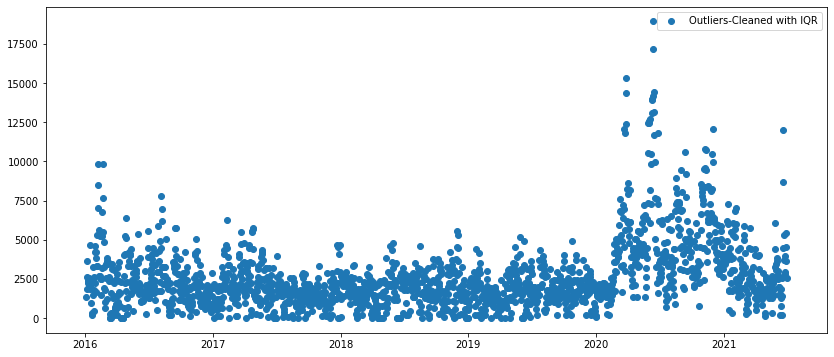

In [200]:
IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas 1.5 IQR
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_iqr['Volume'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_iqr['Volume'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_iqr['Date'], df_dummy_iqr['Volume'], label='Outliers-Cleaned with IQR')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

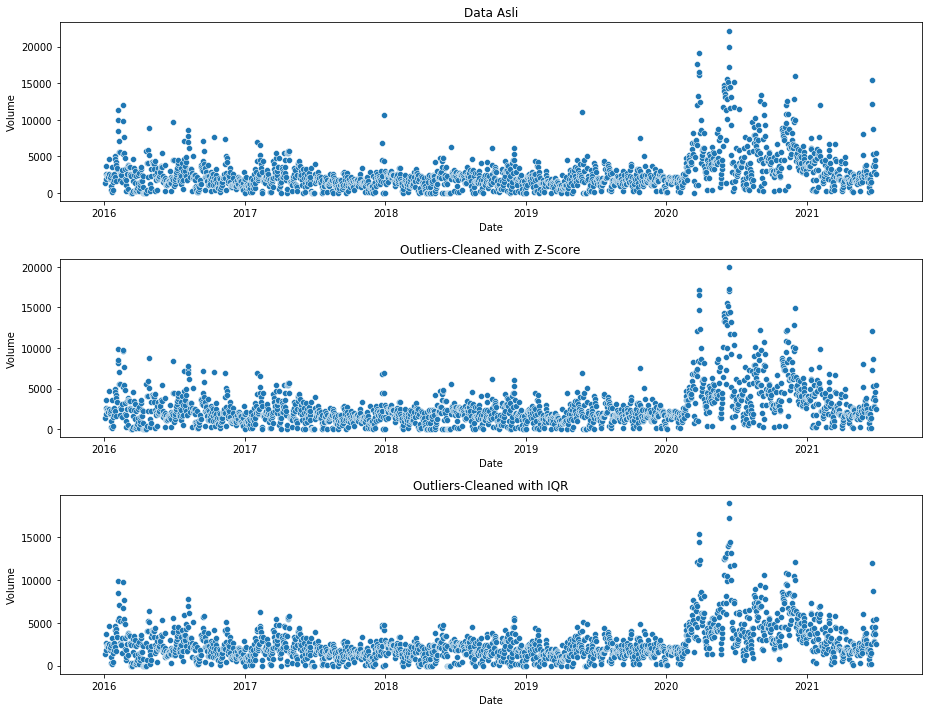

In [201]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(13,10))

sns.scatterplot(df_dummy['Date'], df_dummy['Volume'], ax=ax1)
ax1.set_title('Data Asli')

sns.scatterplot(df_dummy_z['Date'], df_dummy_z['Volume'], ax=ax2)
ax2.set_title('Outliers-Cleaned with Z-Score')

sns.scatterplot(df_dummy_iqr['Date'], df_dummy_iqr['Volume'], ax=ax3)
ax3.set_title('Outliers-Cleaned with IQR')

plt.tight_layout()

### 5) Adj Close

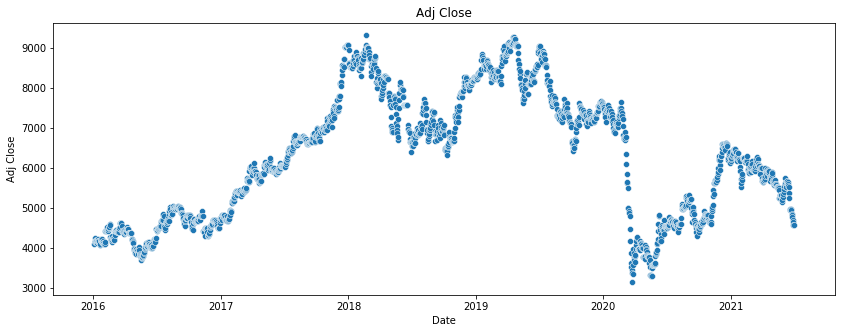

In [202]:
fig, (ax1) = plt.subplots(1,figsize=(14,5))
plt.title('Adj Close')
sns.scatterplot(x=df['Date'], y=df['Adj Close'])

#### Anomaly Detection - ARIMA

ARIMA mensyaratkan data time series untuk memiliki sifat stasioner, yaitu karakteristik data hanya bergantung pada selisih (difference) dari suatu selang waktu, bukan tergantung pada kapan selang waktu tersebut terjadi. Untuk itu, data dapat dikatakan stasioner jika memiliki karakteristik:
1. Mean dan varians yang stabil 
2. Tidak memiliki trend
3. Tidak memiliki seasonality

In [203]:
from statsmodels.tsa.stattools import adfuller

def adfullertest(data):
    result = adfuller(data)
    print(f'ADF Statistics: {result[0]}')
    print(f'p-Value: {result[1]}')
    if result[1] < 0.05:
        print('Stationary')
    else:
        print('Non-Stationary')

Augmented Dickey-Fuller (ADF test) merupakan pengujian statistik untuk mengukur stationarity data. Pengujian ini memiliki hipotesis nol (H0) bahwa data tidak stasioner. Umumnya jika p-value < 0.05, maka dianggap telah cukup bukti untuk menolak H0 dan menerima H1 bahwa data telah memiliki sifat stasioner.

In [204]:
adfullertest(df['Adj Close'])

ADF Statistics: -1.6829794421579323
p-Value: 0.4399026257348651
Non-Stationary


Hasil ADF Test menunjukkan p-value > 0.05. Dari nilai ini dapat ditarik kesimpulan bahwa data masih sangat jauh dari sifat stasioner untuk dapat dijadikan sebagai input ARIMA. Untuk itu, akan digunakan teknik differencing untuk menghilangkan trend dari data dan sekaligus membuat data menjadi lebih stasioner.

#### Differencing Technique

In [205]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

#### Data Asli

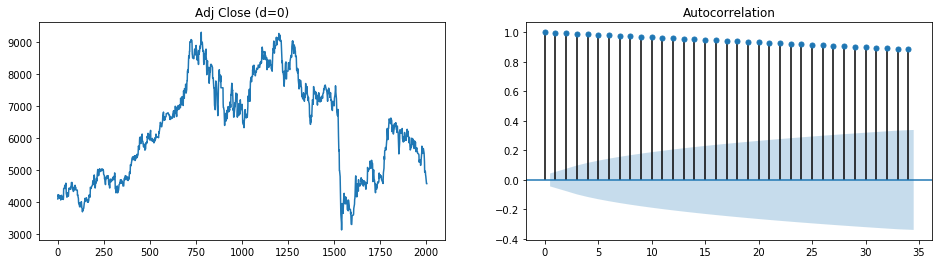

In [206]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Adj Close'])
ax1.set_title('Adj Close (d=0)')
plot_acf(df['Adj Close'], ax=ax2);

Dari visualisasi, mudah terlihat bahwa data asli masih jauh dari sifat stasioner.

#### First Order Differencing (d=1)

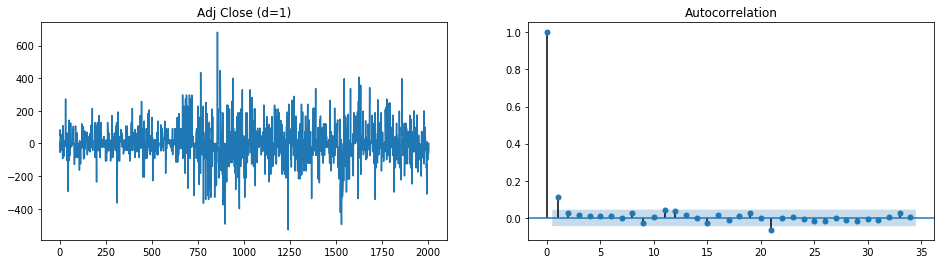

In [207]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Adj Close'].diff().dropna())
ax1.set_title('Adj Close (d=1)')
plot_acf(df['Adj Close'].diff().dropna(), ax=ax2);

Penggunaan teknik differencing sebanyak satu kali terlihat telah berhasil menekan trend dari data dan membuat data menjadi lebih stabil. Selanjutnya dapat diperiksa penggunaan differencing sebanyak dua kali untuk melihat apakah ada perbaikan lebih lanjut yang signifikan.

#### Second Order Differencing (d=2)

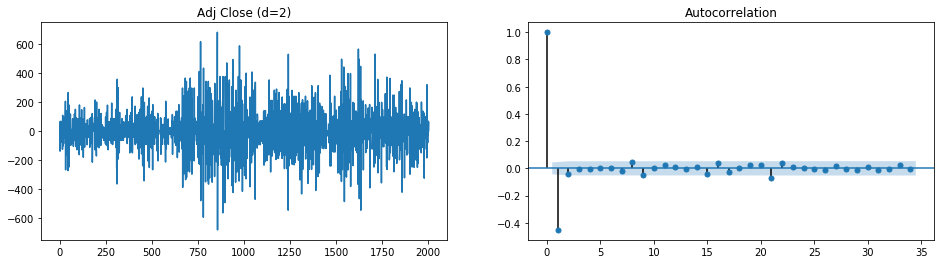

In [208]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Adj Close'].diff().diff().dropna())
ax1.set_title('Adj Close (d=2)')
plot_acf(df['Adj Close'].diff().diff().dropna(), ax=ax2);

Terlihat bahwa differencing sebanyak dua kali tidak terlalu membawa perubahan berarti pada data yang dilakukan differencing sebanyak satu kali. Dari informasi ini, akan digunakan parameter differencing ARIMA d=1. Hasil tersebut juga didukung oleh hasil pencarian otomatis jumlah diferensiasi (ndiffs) menggunakan library pmdarima berikut:

In [209]:
from pmdarima.arima.utils import ndiffs

ndiff = ndiffs(df['Adj Close'], test='adf')
print(f'Differencing coefficient d = {ndiff}')

Differencing coefficient d = 1


#### Autoregression (AR) Parameter

Parameter Autoregression (p) pada ARIMA merupakan jumlah lags yang digunakan ARIMA untuk melakukan prediksi. Dengan kata lain, parameter ini menunjukkan seberapa jauh ARIMA akan meihat past values untuk melakukan prediksi terhadap data baru. Untuk menentukannya dapat digunakan analisis Partial Autocorrelation Function (PACF).

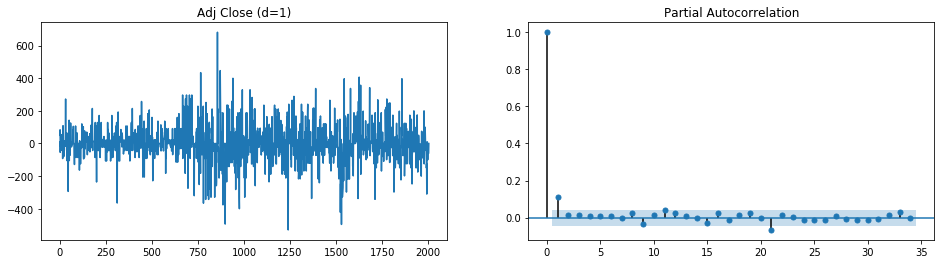

In [210]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Adj Close'].diff().dropna())
ax1.set_title('Adj Close (d=1)')
plot_pacf(df['Adj Close'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai p term pada ARIMA. Pada model ini, akan digunakan p = 1.

#### Moving Average (MA) Parameter

Parameter Moving Average (q) pada ARIMA menunjukkan seberapa jauh error lags yang dipertimbangkan untuk melakukan prediksi. Parameter ini dapat ditentukan dengan menggunakan analisis Autocorrelation Function (ACF).

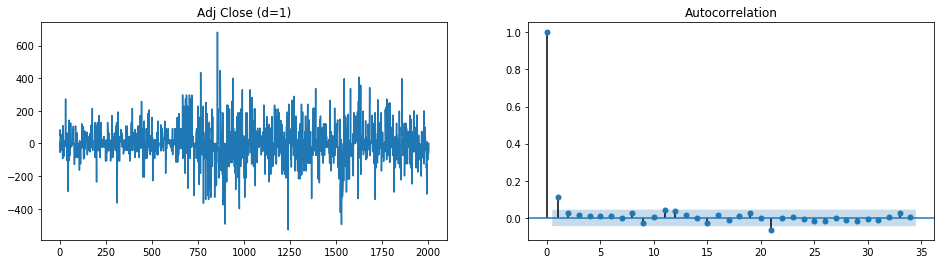

In [212]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Adj Close'].diff().dropna())
ax1.set_title('Adj Close (d=1)')
plot_acf(df['Adj Close'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai q term pada ARIMA. Pada model ini, akan digunakan q = 1.

#### ARIMA Model

Dari analisis sebelumnya, akan digunakan model ARIMA untuk melakukan fitting terhadap data asli Positif Harian dengan parameter:
- ARIMA(p,d,q) = ARIMA(1,1,1)

In [213]:
model = ARIMA(df['Adj Close'], order=(1,1,1))
result = model.fit()

In [214]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 2004
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12000.289
Date:                Sat, 11 Dec 2021   AIC                          24006.578
Time:                        23:37:29   BIC                          24023.385
Sample:                             0   HQIC                         24012.749
                               - 2004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2827      0.163      1.732      0.083      -0.037       0.603
ma.L1         -0.1730      0.169     -1.023      0.306      -0.504       0.159
sigma2      9374.1365    158.255     59.234      0.0

### Model Fitting

In [217]:
df_dummy['forecast'] = result.predict(start=1, end=2003, typ='levels')
df_dummy['Error'] = df_dummy['Adj Close'] - df_dummy['forecast']

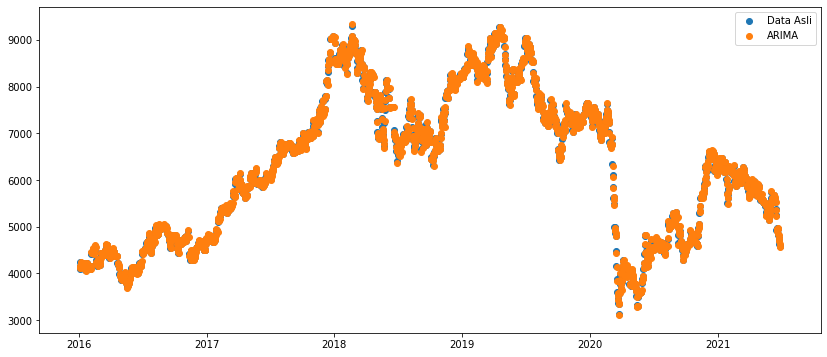

In [218]:
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Adj Close'], label='Data Asli')
ax.scatter(df_dummy['Date'], df_dummy['forecast'], label='ARIMA')
plt.legend()

Dari visualisasi di atas, diperoleh hasil fitting dan prediksi model ARIMA terhadap data asli. Hasil forecast ARIMA (oranye) akan dijadikan sebagai ground truth data 'normal' dalam pencarian outliers. Error selisih prediksi ARIMA dengan data asli dapat dilihat pada visualisasi berikut:

Text(0.5, 1.0, 'Residual Error')

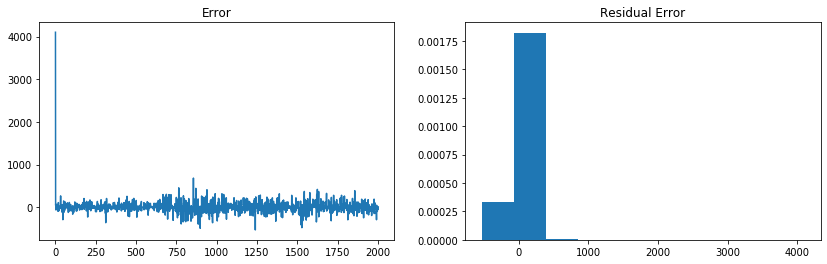

In [219]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
ax1.plot(result.resid)
ax1.set_title('Error')
ax2.hist(result.resid, density=True)
ax2.set_title('Residual Error')

In [220]:
result.resid.skew()

14.569471026772867

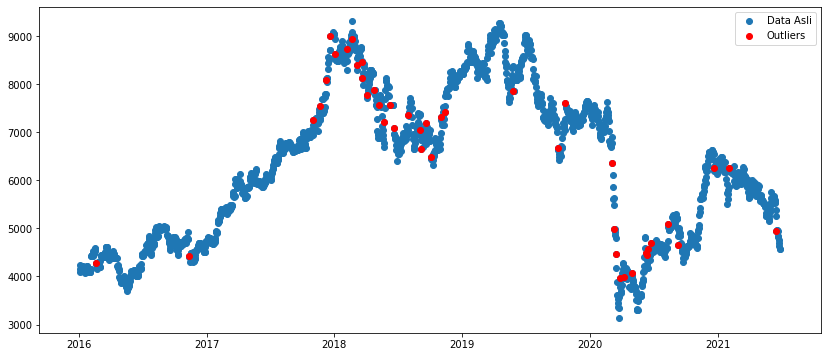

In [221]:
# Menggunakan Z-Score dengan batas 3 std

up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Adj Close'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Adj Close'][out_index], c='Red', label='Outliers')
plt.legend()

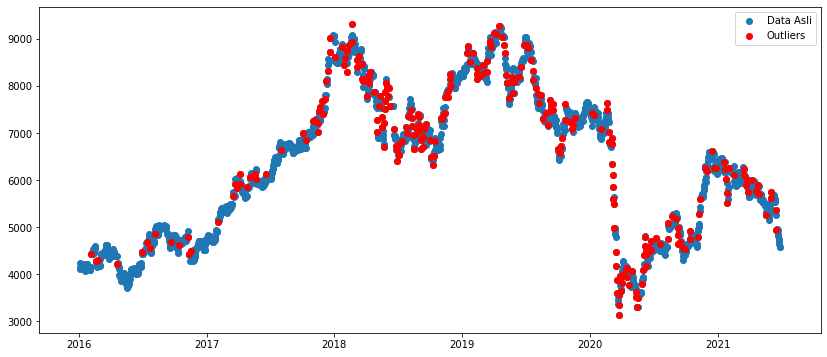

In [222]:
# Menggunakan Tukey's Fence dengan batas 1.5 Interquartile Range (IQR)

IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Adj Close'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Adj Close'][out_index], c='Red', label='Outliers')
plt.legend()

Diperoleh hasil metode deteksi anomali dengan Z-Score memberikan hasil yang lebih mild (moderat) dibandingkan Tukey's Fence yang terlihat lebih ketat dalam memberikan threshold anomali.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


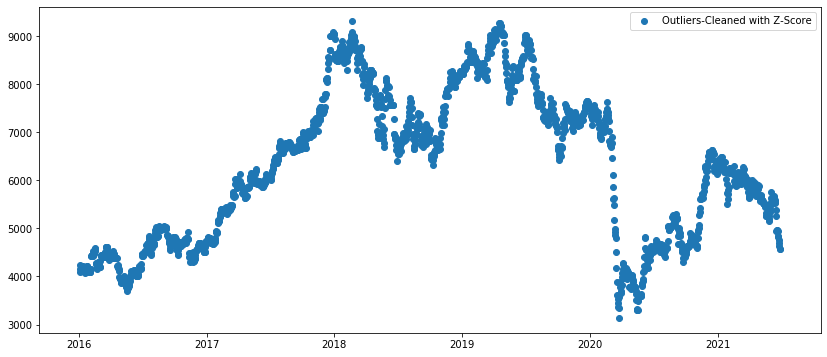

In [223]:
up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas Z-Score = +/- 3
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_z['Adj Close'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_z['Adj Close'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_z['Date'], df_dummy_z['Adj Close'], label='Outliers-Cleaned with Z-Score')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


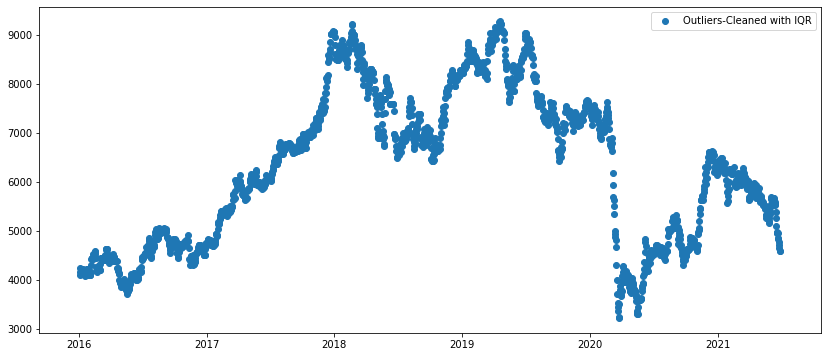

In [224]:
IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas 1.5 IQR
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_iqr['Adj Close'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_iqr['Adj Close'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_iqr['Date'], df_dummy_iqr['Adj Close'], label='Outliers-Cleaned with IQR')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

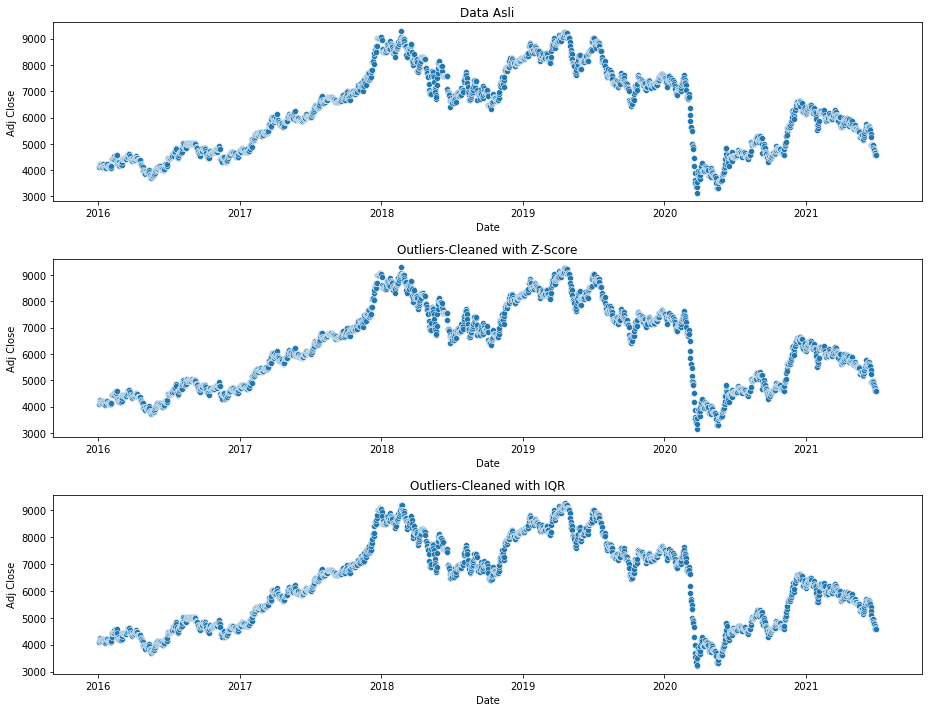

In [225]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(13,10))

sns.scatterplot(df_dummy['Date'], df_dummy['Adj Close'], ax=ax1)
ax1.set_title('Data Asli')

sns.scatterplot(df_dummy_z['Date'], df_dummy_z['Adj Close'], ax=ax2)
ax2.set_title('Outliers-Cleaned with Z-Score')

sns.scatterplot(df_dummy_iqr['Date'], df_dummy_iqr['Adj Close'], ax=ax3)
ax3.set_title('Outliers-Cleaned with IQR')

plt.tight_layout()

### 6) Close

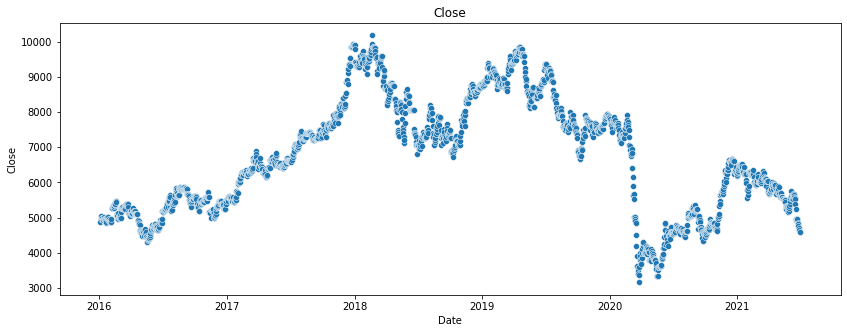

In [226]:
fig, (ax1) = plt.subplots(1,figsize=(14,5))
plt.title('Close')
sns.scatterplot(x=df['Date'], y=df['Close'])

#### Anomaly Detection - ARIMA

ARIMA mensyaratkan data time series untuk memiliki sifat stasioner, yaitu karakteristik data hanya bergantung pada selisih (difference) dari suatu selang waktu, bukan tergantung pada kapan selang waktu tersebut terjadi. Untuk itu, data dapat dikatakan stasioner jika memiliki karakteristik:
1. Mean dan varians yang stabil 
2. Tidak memiliki trend
3. Tidak memiliki seasonality

In [227]:
from statsmodels.tsa.stattools import adfuller

def adfullertest(data):
    result = adfuller(data)
    print(f'ADF Statistics: {result[0]}')
    print(f'p-Value: {result[1]}')
    if result[1] < 0.05:
        print('Stationary')
    else:
        print('Non-Stationary')

Augmented Dickey-Fuller (ADF test) merupakan pengujian statistik untuk mengukur stationarity data. Pengujian ini memiliki hipotesis nol (H0) bahwa data tidak stasioner. Umumnya jika p-value < 0.05, maka dianggap telah cukup bukti untuk menolak H0 dan menerima H1 bahwa data telah memiliki sifat stasioner.

In [228]:
adfullertest(df['Close'])

ADF Statistics: -1.5146042853397461
p-Value: 0.5262748352972637
Non-Stationary


Hasil ADF Test menunjukkan p-value > 0.05. Dari nilai ini dapat ditarik kesimpulan bahwa data masih sangat jauh dari sifat stasioner untuk dapat dijadikan sebagai input ARIMA. Untuk itu, akan digunakan teknik differencing untuk menghilangkan trend dari data dan sekaligus membuat data menjadi lebih stasioner.

#### Differencing Technique

In [229]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

#### Data Asli

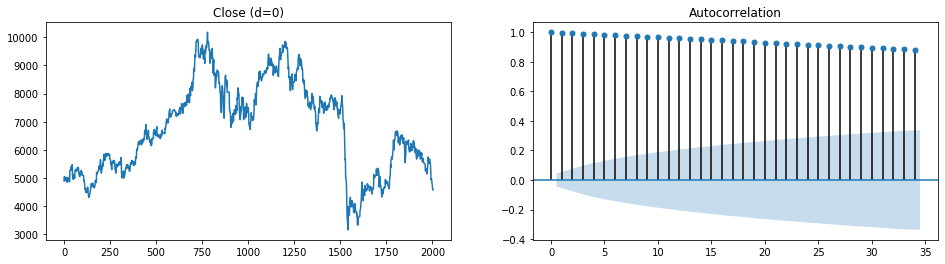

In [230]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Close'])
ax1.set_title('Close (d=0)')
plot_acf(df['Close'], ax=ax2);

Dari visualisasi, mudah terlihat bahwa data asli masih jauh dari sifat stasioner.

#### First Order Differencing (d=1)

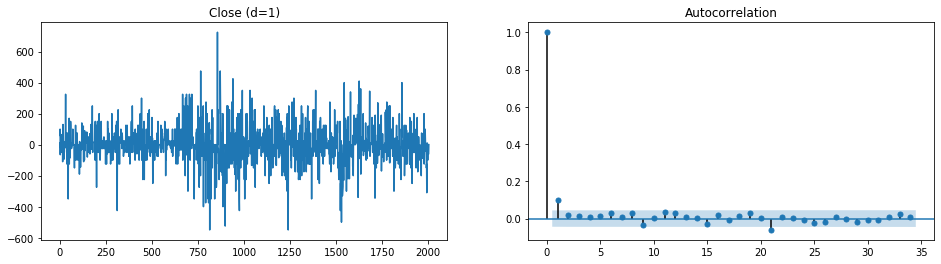

In [231]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Close'].diff().dropna())
ax1.set_title('Close (d=1)')
plot_acf(df['Close'].diff().dropna(), ax=ax2);

Penggunaan teknik differencing sebanyak satu kali terlihat telah berhasil menekan trend dari data dan membuat data menjadi lebih stabil. Selanjutnya dapat diperiksa penggunaan differencing sebanyak dua kali untuk melihat apakah ada perbaikan lebih lanjut yang signifikan.

#### Second Order Differencing (d=2)

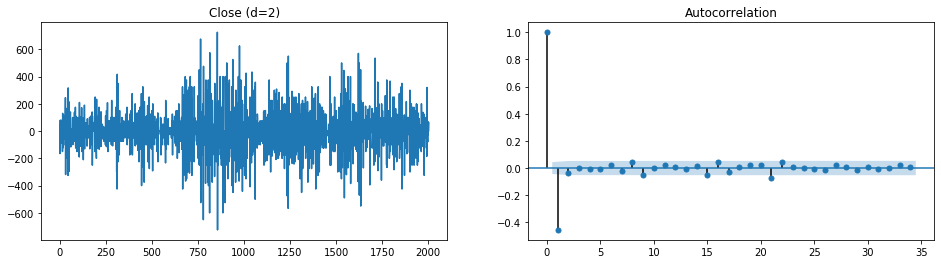

In [232]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Close'].diff().diff().dropna())
ax1.set_title('Close (d=2)')
plot_acf(df['Close'].diff().diff().dropna(), ax=ax2);

Terlihat bahwa differencing sebanyak dua kali tidak terlalu membawa perubahan berarti pada data yang dilakukan differencing sebanyak satu kali. Dari informasi ini, akan digunakan parameter differencing ARIMA d=1. Hasil tersebut juga didukung oleh hasil pencarian otomatis jumlah diferensiasi (ndiffs) menggunakan library pmdarima berikut:

In [233]:
from pmdarima.arima.utils import ndiffs

ndiff = ndiffs(df['Close'], test='adf')
print(f'Differencing coefficient d = {ndiff}')

Differencing coefficient d = 1


#### Autoregression (AR) Parameter

Parameter Autoregression (p) pada ARIMA merupakan jumlah lags yang digunakan ARIMA untuk melakukan prediksi. Dengan kata lain, parameter ini menunjukkan seberapa jauh ARIMA akan meihat past values untuk melakukan prediksi terhadap data baru. Untuk menentukannya dapat digunakan analisis Partial Autocorrelation Function (PACF).

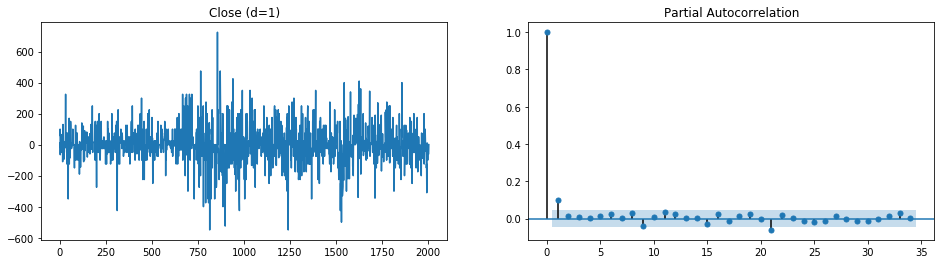

In [234]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Close'].diff().dropna())
ax1.set_title('Close (d=1)')
plot_pacf(df['Close'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai p term pada ARIMA. Pada model ini, akan digunakan p = 1.

#### Moving Average (MA) Parameter

Parameter Moving Average (q) pada ARIMA menunjukkan seberapa jauh error lags yang dipertimbangkan untuk melakukan prediksi. Parameter ini dapat ditentukan dengan menggunakan analisis Autocorrelation Function (ACF).

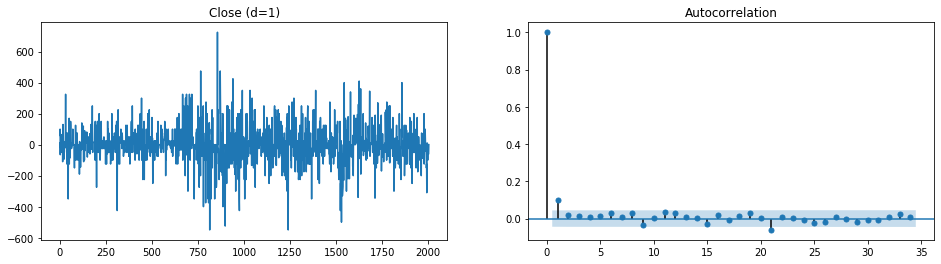

In [235]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(df['Close'].diff().dropna())
ax1.set_title('Close (d=1)')
plot_acf(df['Close'].diff().dropna(), ax=ax2);

Terlihat bahwa terdapat beberapa opsi lags yang berada di luar significant line sehingga dapat digunakan sebagai q term pada ARIMA. Pada model ini, akan digunakan q = 1.

#### ARIMA Model

Dari analisis sebelumnya, akan digunakan model ARIMA untuk melakukan fitting terhadap data asli Positif Harian dengan parameter:
- ARIMA(p,d,q) = ARIMA(1,1,1)

In [236]:
model = ARIMA(df['Close'], order=(1,1,1))
result = model.fit()

In [237]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2004
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12130.164
Date:                Sat, 11 Dec 2021   AIC                          24266.327
Time:                        23:38:41   BIC                          24283.134
Sample:                             0   HQIC                         24272.498
                               - 2004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2206      0.188      1.174      0.240      -0.148       0.589
ma.L1         -0.1207      0.193     -0.625      0.532      -0.499       0.258
sigma2      1.067e+04    179.182     59.554      0.0

### Model Fitting

In [238]:
df_dummy['forecast'] = result.predict(start=1, end=2003, typ='levels')
df_dummy['Error'] = df_dummy['Close'] - df_dummy['forecast']

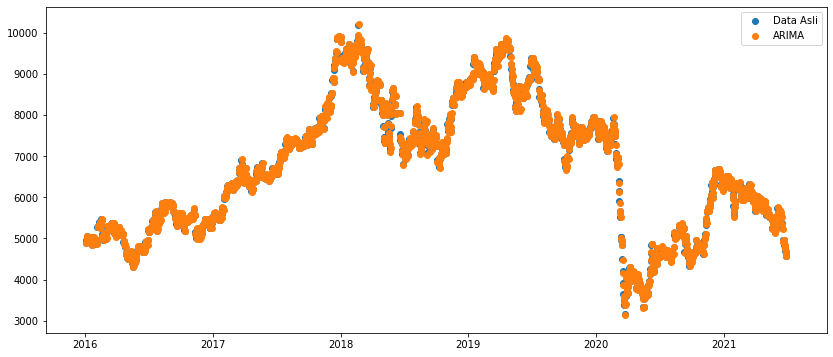

In [239]:
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Close'], label='Data Asli')
ax.scatter(df_dummy['Date'], df_dummy['forecast'], label='ARIMA')
plt.legend()

Dari visualisasi di atas, diperoleh hasil fitting dan prediksi model ARIMA terhadap data asli. Hasil forecast ARIMA (oranye) akan dijadikan sebagai ground truth data 'normal' dalam pencarian outliers. Error selisih prediksi ARIMA dengan data asli dapat dilihat pada visualisasi berikut:

Text(0.5, 1.0, 'Residual Error')

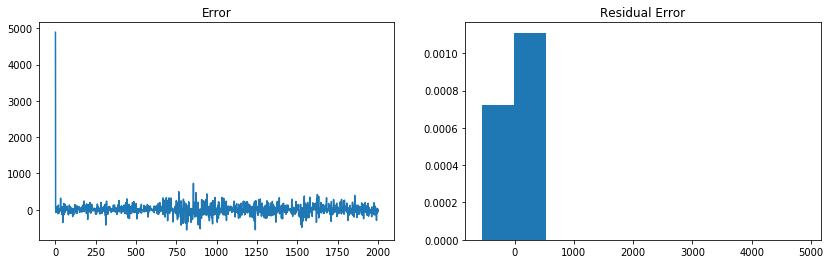

In [240]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
ax1.plot(result.resid)
ax1.set_title('Error')
ax2.hist(result.resid, density=True)
ax2.set_title('Residual Error')

In [241]:
result.resid.skew()

17.17122860289032

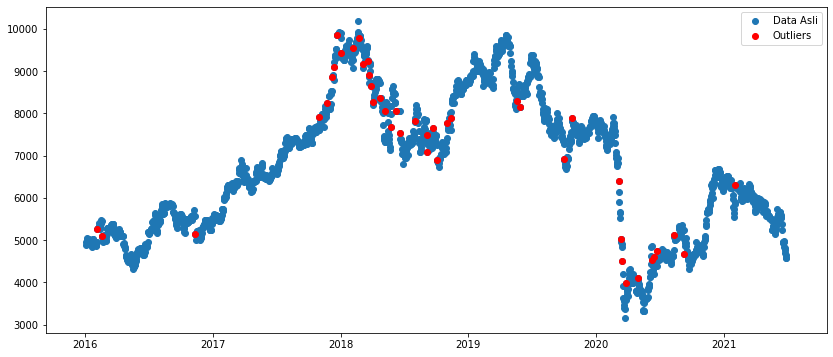

In [242]:
# Menggunakan Z-Score dengan batas 3 std

up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Close'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Close'][out_index], c='Red', label='Outliers')
plt.legend()

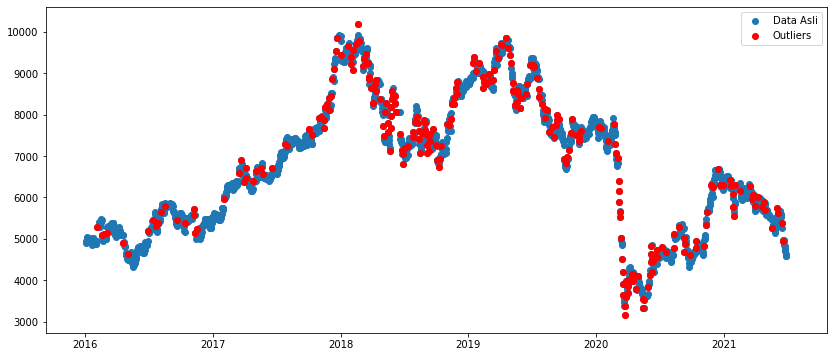

In [243]:
# Menggunakan Tukey's Fence dengan batas 1.5 Interquartile Range (IQR)

IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy['Date'], df_dummy['Close'], label='Data Asli')
ax.scatter(df_dummy['Date'][out_index], df_dummy['Close'][out_index], c='Red', label='Outliers')
plt.legend()

Diperoleh hasil metode deteksi anomali dengan Z-Score memberikan hasil yang lebih mild (moderat) dibandingkan Tukey's Fence yang terlihat lebih ketat dalam memberikan threshold anomali.

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


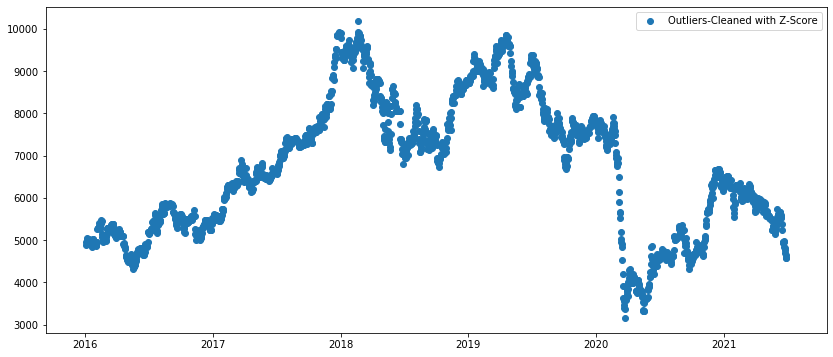

In [244]:
up_stat_thres = df_dummy['Error'].mean() + (3 * df_dummy['Error'].std())
down_stat_thres = df_dummy['Error'].mean() - (3 * df_dummy['Error'].std())
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas Z-Score = +/- 3
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_z['Close'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_z['Close'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_z['Date'], df_dummy_z['Close'], label='Outliers-Cleaned with Z-Score')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


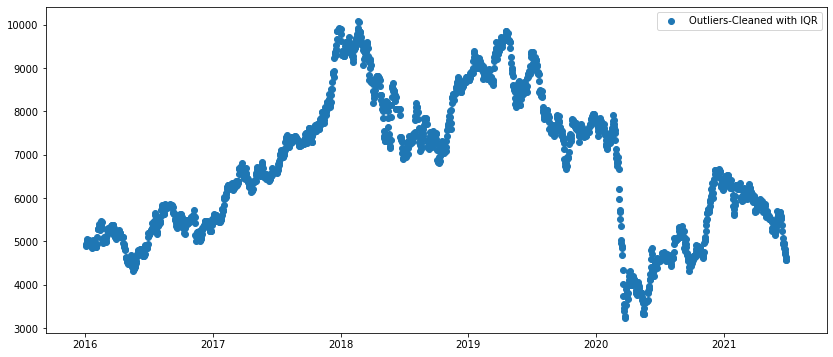

In [245]:
IQR = df_dummy['Error'].quantile(0.75) - df_dummy['Error'].quantile(0.25)
up_stat_thres = df_dummy['Error'].quantile(0.75) + (1.5*IQR)
down_stat_thres = df_dummy['Error'].quantile(0.25) - (1.5*IQR)
out_index = df_dummy.index[(df_dummy['Error'] > up_stat_thres) | (df_dummy['Error'] < down_stat_thres)]

# Mengganti outliers dengan nilai batas 1.5 IQR
for index in out_index:
    if df_dummy['Error'][index] > up_stat_thres:
        df_dummy_iqr['Close'][index] = up_stat_thres + df_dummy['forecast'][index]
    elif df_dummy['Error'][index] < down_stat_thres:
        df_dummy_iqr['Close'][index] = down_stat_thres + df_dummy['forecast'][index]
        
fig, ax = plt.subplots(1,1,figsize=(14,6))
ax.scatter(df_dummy_iqr['Date'], df_dummy_iqr['Close'], label='Outliers-Cleaned with IQR')
plt.legend()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

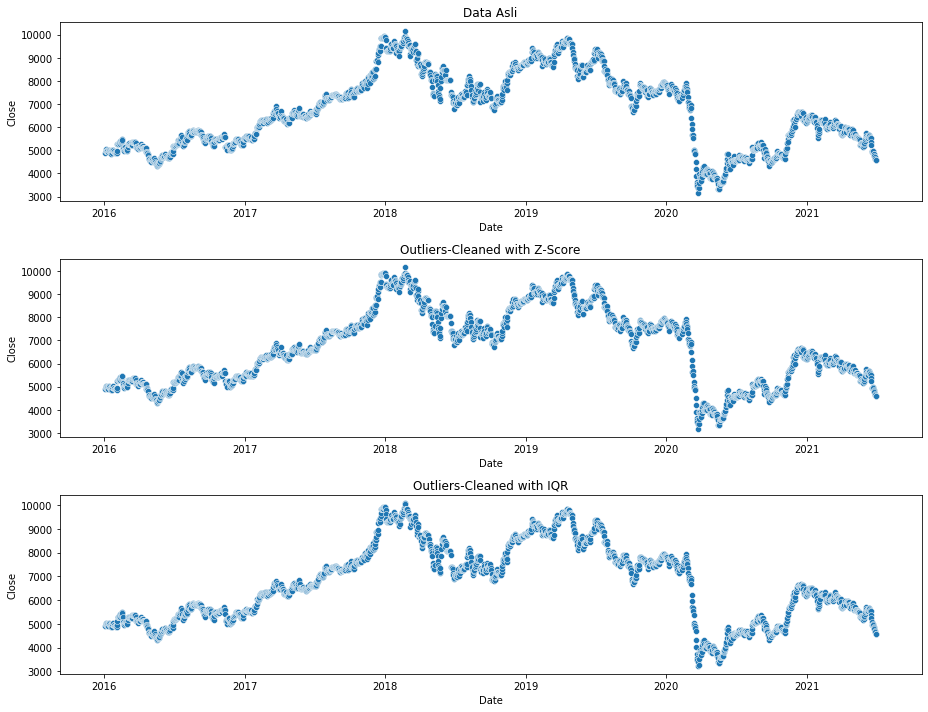

In [246]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(13,10))

sns.scatterplot(df_dummy['Date'], df_dummy['Close'], ax=ax1)
ax1.set_title('Data Asli')

sns.scatterplot(df_dummy_z['Date'], df_dummy_z['Close'], ax=ax2)
ax2.set_title('Outliers-Cleaned with Z-Score')

sns.scatterplot(df_dummy_iqr['Date'], df_dummy_iqr['Close'], ax=ax3)
ax3.set_title('Outliers-Cleaned with IQR')

plt.tight_layout()

### Saving Preprocessed Data

In [247]:
data = df.copy()

#### Opsi Data I

In [248]:
# Menggunakan Analisis Outliers dengan IQR untuk Error Time Series
data['Open'] = df_dummy_iqr['Open']
data['High'] = df_dummy_iqr['High']
data['Low'] = df_dummy_iqr['Low']
data['Volume'] = df_dummy_iqr['Volume']
data['Adj Close'] = df_dummy_iqr['Adj Close']
data['Close'] = df_dummy_iqr['Close']
data = data[['Date', 'Open', 'High', 'Low', 'Volume', 'Adj Close', 'Close']]
data

Date         Open         High     Low  Volume  Adj Close   Close
0    2016-01-04  4990.000000  5025.000000  4885.0  1366.0    4102.94  4890.0
1    2016-01-05  4890.000000  4975.000000  4890.0  2646.0    4153.28  4950.0
2    2016-01-06  4960.000000  5097.632333  4935.0  3638.0    4237.19  5050.0
3    2016-01-07  5000.000000  5092.812785  4985.0  1865.0    4182.65  4985.0
4    2016-01-08  5000.000000  5050.000000  4975.0  2435.0    4195.24  5000.0
...         ...          ...          ...     ...     ...        ...     ...
1999 2021-06-25  4820.000000  4880.000000  4760.0  2794.0    4760.00  4760.0
2000 2021-06-26  4796.666667  4836.666667  4700.0  3662.0    4700.00  4700.0
2001 2021-06-27  4773.333333  4793.333333  4640.0  4530.0    4640.00  4640.0
2002 2021-06-28  4750.000000  4750.000000  4580.0  5398.0    4580.00  4580.0
2003 2021-06-29  4580.000000  4660.000000  4560.0  2553.0    4580.00  4580.0

[2004 rows x 7 columns]

In [249]:
data.to_csv('BNI_Preprocessed_Data', index=False)